In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pdb
import scipy
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from tqdm.notebook import tqdm
from scipy.io import loadmat
from scipy.io import savemat
import math
from fittingFunctionV0_usesScipyOptimizeMinimize import fittingStatistics_v0
from fittingFunctionV1_usesScipyOptimizeMinimize import fittingStatistics_v1
from fittingFunctionV2_usesScipyOptimizeMinimize import fittingStatistics_v2
from fittingFunctionV3_usesScipyOptimizeMinimize import fittingStatistics_v3
from fittingFunctionV4_usesScipyOptimizeMinimize import fittingStatistics_v4
from fittingFunctionV5_usesScipyOptimizeMinimize import fittingStatistics_v5
from fittingFunctionV6_usesScipyOptimizeMinimize import fittingStatistics_v6
from fittingFunctionV7_usesScipyOptimizeMinimize import fittingStatistics_v7
from fittingFunctionV8_usesScipyOptimizeMinimize import fittingStatistics_v8
from fittingFunctionV9_usesScipyOptimizeMinimize import fittingStatistics_v9
from fittingFunctionV10_usesScipyOptimizeMinimize import fittingStatistics_v10
from fittingFunctionV11_usesScipyOptimizeMinimize import fittingStatistics_v11
from fittingFunctionV12_usesScipyOptimizeMinimize import fittingStatistics_v12
from fittingFunctionV13_usesScipyOptimizeMinimize import fittingStatistics_v13
from fittingFunctionV14_usesScipyOptimizeMinimize import fittingStatistics_v14
from fittingFunctionV15_usesScipyOptimizeMinimize import fittingStatistics_v15
from utils import *
from PostProcessingUtils import *
import seaborn as sns
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



In [2]:
"""
meta parameters
"""

fitting_fnNames = [fittingStatistics_v0, fittingStatistics_v1, fittingStatistics_v2, fittingStatistics_v3,
                   fittingStatistics_v4, fittingStatistics_v5, fittingStatistics_v6, fittingStatistics_v7,
                   fittingStatistics_v8, fittingStatistics_v9, fittingStatistics_v10, fittingStatistics_v11,
                   fittingStatistics_v12, fittingStatistics_v13, fittingStatistics_v14, fittingStatistics_v15]
num_startingPts = 1#len(fitting_fnNames)

responseFunctionMat = loadmat('Across_many_datasets/som/TrialAverageActivityAllCellsPopulationTdelay_Fitting.mat')
num_cells = 1#responseFunctionMat['Ind_CellSelectionIncludingSEM'].shape[0]
amplitude = np.array([0,30,50,60,70,80,90],dtype=np.float128)

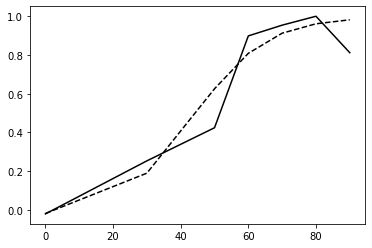

5 0.8155263435668879 0.011526766501497905 [ 9.95606841e-01 -3.64915729e-02  4.37362878e+01 -1.07885854e+01]


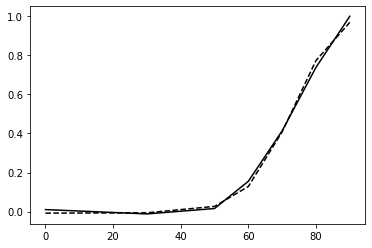

18 0.9780827141816864 0.0011948928840731733 [ 1.04601016e+00 -8.12718168e-03  7.28836758e+01 -6.76216024e+00]


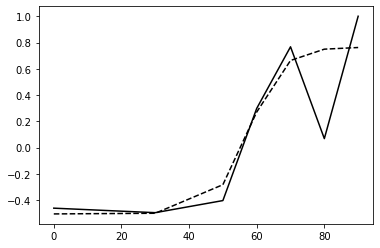

31 0.9770391407560487 0.12120680931824174 [ 0.76395169 -0.50505995 57.74016223 -5.00004563]


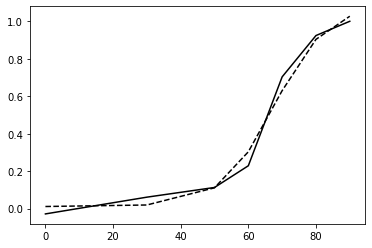

48 1.0 0.008456183319662153 [ 1.08308833e+00  1.10128245e-02  6.75949998e+01 -7.73842905e+00]


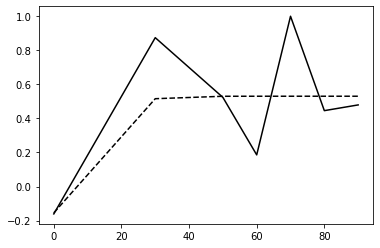

36 0.55142369311452 0.19348856453298197 [ 0.53028655 -0.24322162 10.22640517 -5.00003587]


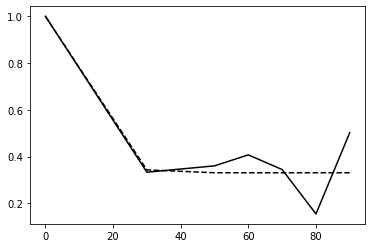

67 0.5884846672761346 0.17142254974154036 [ 0.33052821  1.10076476  9.44026183 -5.00005427]


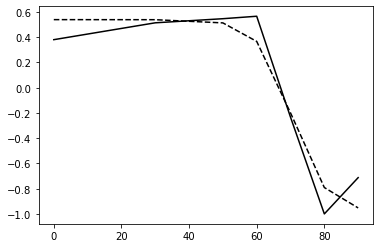

74 0.6979175700204477 0.06644299674938146 [-0.98146102  0.5391063  70.28149888 -5.00006454]


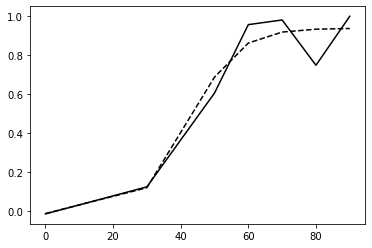

5 1.0 0.007239089671424899 [ 9.38282673e-01 -1.53674542e-02  4.27304934e+01 -7.05375474e+00]


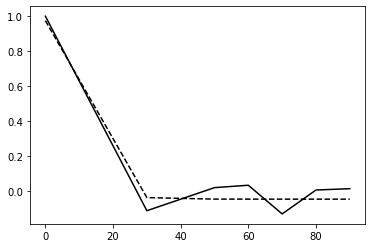

12 0.8722996132846756 0.06565536152408429 [-0.04788374  1.37974973  4.62711138 -5.00005929]


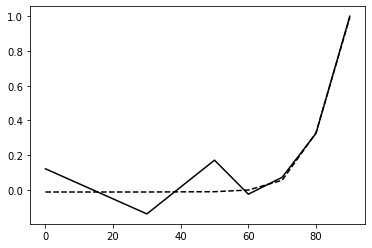

14 0.7716349045862028 0.16114644461431996 [ 1.61326684e+00 -1.20246490e-02  8.73383372e+01 -5.52275451e+00]


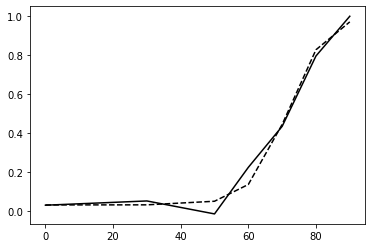

18 0.9559626450447848 0.010827762003656857 [ 1.00540059e+00  3.01506998e-02  7.16910527e+01 -5.53322193e+00]


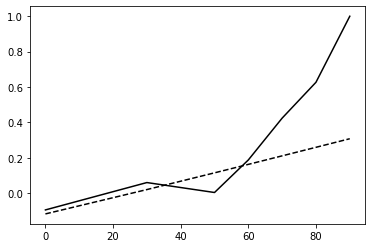

48 1.0 0.09950039565964448 [   1.85243597   -1.24101561   89.68689985 -159.52495749]


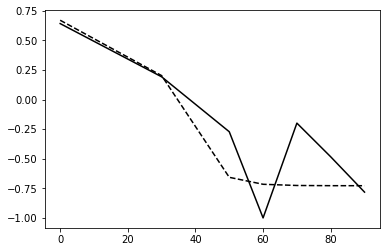

60 0.8672724329197498 0.17133952770296945 [-0.72783592  0.67430224 33.77013871 -5.53854032]


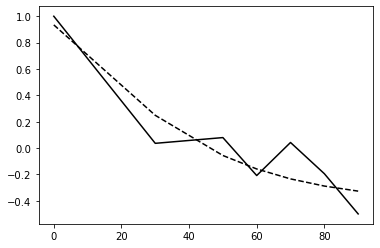

10 1.0 0.11794143391055797 [ -0.41471824   2.21132664   1.44293407 -26.30464644]


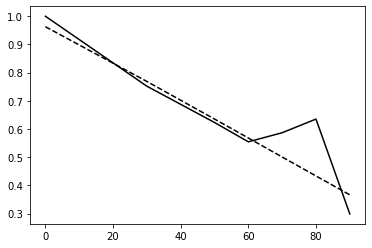

16 1.0 0.12616848053634488 [  -1.1552147     2.22582989   64.84791431 -125.42375836]


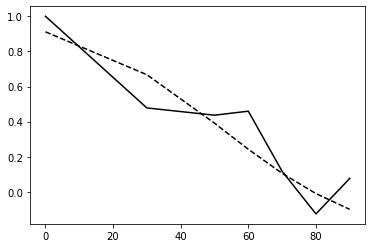

58 0.8201791674228632 0.1206124949517017 [ -0.30098905   1.02820757  51.85039046 -22.15913753]


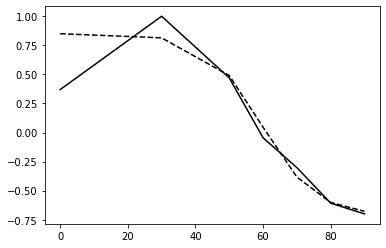

23 0.6290023727199429 0.05599278494061021 [-0.70985504  0.85058045 59.49906139 -7.89830373]


In [3]:
dictNoLightSigmoidLowRSquared = {}
dictMidLightSigmoidLowRSquared = {}
dictHighLightSigmoidLowRSquared = {}
dictNoLightGaussLowRSquared = {}
dictMidLightGaussLowRSquared = {}
dictHighLightGaussLowRSquared = {}
dictNoLightSigmoidLowRSquaredFitParams = {}
dictMidLightSigmoidLowRSquaredFitParams = {}
dictHighLightSigmoidLowRSquaredFitParams = {}
dictNoLightGaussLowRSquaredFitParams = {}
dictMidLightGaussLowRSquaredFitParams = {}
dictHighLightGaussLowRSquaredFitParams = {}
dictNoLightSigmoidLowRSquaredValues = {}
dictMidLightSigmoidLowRSquaredValues = {}
dictHighLightSigmoidLowRSquaredValues = {}
dictNoLightGaussLowRSquaredValues = {}
dictMidLightGaussLowRSquaredValues = {}
dictHighLightGaussLowRSquaredValues = {}

for jj in range(num_startingPts):
    for i in range(num_cells):
        
        prevNoLightSigmoidLowRSquared = []
        prevMidLightSigmoidLowRSquared = []
        prevHighLightSigmoidLowRSquared = []
        prevNoLightGaussLowRSquared = []
        prevMidLightGaussLowRSquared = []
        prevHighLightGaussLowRSquared = []
        prevNoLightSigmoidLowRSquaredFitParams = []
        prevMidLightSigmoidLowRSquaredFitParams = [] 
        prevHighLightSigmoidLowRSquaredFitParams = [] 
        prevNoLightGaussLowRSquaredFitParams = [] 
        prevMidLightGaussLowRSquaredFitParams = [] 
        prevHighLightGaussLowRSquaredFitParams = []
        prevNoLightSigmoidLowRSquaredValues = []
        prevMidLightSigmoidLowRSquaredValues = []
        prevHighLightSigmoidLowRSquaredValues = []
        prevNoLightGaussLowRSquaredValues = []
        prevMidLightGaussLowRSquaredValues = []
        prevHighLightGaussLowRSquaredValues = []
    
        [nextNoLightSigmoidLowRSquared, 
         nextMidLightSigmoidLowRSquared, 
         nextHighLightSigmoidLowRSquared, 
         nextNoLightGaussLowRSquared, 
         nextMidLightGaussLowRSquared, 
         nextHighLightGaussLowRSquared,
         nextNoLightSigmoidLowRSquaredFitParams, 
         nextMidLightSigmoidLowRSquaredFitParams, 
         nextHighLightSigmoidLowRSquaredFitParams, 
         nextNoLightGaussLowRSquaredFitParams, 
         nextMidLightGaussLowRSquaredFitParams, 
         nextHighLightGaussLowRSquaredFitParams,
         nextNoLightSigmoidLowRSquaredValues, 
         nextMidLightSigmoidLowRSquaredValues, 
         nextHighLightSigmoidLowRSquaredValues, 
         nextNoLightGaussLowRSquaredValues, 
         nextMidLightGaussLowRSquaredValues, 
         nextHighLightGaussLowRSquaredValues] = fitting_fnNames[jj](noLightSigmoidLowRSquared = prevNoLightSigmoidLowRSquared, 
                                                        midLightSigmoidLowRSquared = prevMidLightSigmoidLowRSquared, 
                                                        highLightSigmoidLowRSquared = prevHighLightSigmoidLowRSquared, 
                                                        noLightGaussLowRSquared = prevNoLightGaussLowRSquared, 
                                                        midLightGaussLowRSquared = prevMidLightGaussLowRSquared, 
                                                        highLightGaussLowRSquared = prevHighLightGaussLowRSquared,
                                                        noLightSigmoidLowRSquaredFitParams = prevNoLightSigmoidLowRSquaredFitParams,
                                                        midLightSigmoidLowRSquaredFitParams = prevMidLightSigmoidLowRSquaredFitParams,
                                                        highLightSigmoidLowRSquaredFitParams = prevHighLightSigmoidLowRSquaredFitParams,
                                                        noLightGaussLowRSquaredFitParams = prevNoLightGaussLowRSquaredFitParams,
                                                        midLightGaussLowRSquaredFitParams = prevMidLightGaussLowRSquaredFitParams,
                                                        highLightGaussLowRSquaredFitParams = prevHighLightGaussLowRSquaredFitParams,
                                                        noLightSigmoidLowRSquaredValues = prevNoLightSigmoidLowRSquaredValues,
                                                        midLightSigmoidLowRSquaredValues = prevMidLightSigmoidLowRSquaredValues,
                                                        highLightSigmoidLowRSquaredValues = prevHighLightSigmoidLowRSquaredValues, 
                                                        noLightGaussLowRSquaredValues = prevNoLightGaussLowRSquaredValues, 
                                                        midLightGaussLowRSquaredValues = prevMidLightGaussLowRSquaredValues,
                                                        highLightGaussLowRSquaredValues = prevHighLightGaussLowRSquaredValues,
                                                        responses_all = responseFunctionMat['Ind_CellSelectionIncludingSEM'][i,0],
                                                        sem_all = responseFunctionMat['Ind_CellSelectionIncludingSEM'][i,1],
                                                        amplitude=amplitude)
        
        
        dictNoLightSigmoidLowRSquared[jj,i] = nextNoLightSigmoidLowRSquared
        dictMidLightSigmoidLowRSquared[jj,i] = nextMidLightSigmoidLowRSquared
        dictHighLightSigmoidLowRSquared[jj,i] = nextHighLightSigmoidLowRSquared
        dictNoLightGaussLowRSquared[jj,i] = nextNoLightGaussLowRSquared
        dictMidLightGaussLowRSquared[jj,i] = nextMidLightGaussLowRSquared
        dictHighLightGaussLowRSquared[jj,i] = nextHighLightGaussLowRSquared
        dictNoLightSigmoidLowRSquaredFitParams[jj,i] = nextNoLightSigmoidLowRSquaredFitParams
        dictMidLightSigmoidLowRSquaredFitParams[jj,i] = nextMidLightSigmoidLowRSquaredFitParams
        dictHighLightSigmoidLowRSquaredFitParams[jj,i] = nextHighLightSigmoidLowRSquaredFitParams
        dictNoLightGaussLowRSquaredFitParams[jj,i] = nextNoLightGaussLowRSquaredFitParams
        dictMidLightGaussLowRSquaredFitParams[jj,i] = nextMidLightGaussLowRSquaredFitParams
        dictHighLightGaussLowRSquaredFitParams[jj,i] = nextHighLightGaussLowRSquaredFitParams
        dictNoLightSigmoidLowRSquaredValues[jj,i] = nextNoLightSigmoidLowRSquaredValues
        dictMidLightSigmoidLowRSquaredValues[jj,i] = nextMidLightSigmoidLowRSquaredValues
        dictHighLightSigmoidLowRSquaredValues[jj,i] = nextHighLightSigmoidLowRSquaredValues
        dictNoLightGaussLowRSquaredValues[jj,i] = nextNoLightGaussLowRSquaredValues
        dictMidLightGaussLowRSquaredValues[jj,i] = nextMidLightGaussLowRSquaredValues
        dictHighLightGaussLowRSquaredValues[jj,i] = nextHighLightGaussLowRSquaredValues

In [4]:
"""
Combining different starting point conditions for all the datasets across different light conditions

To do (this is from before 3/6/21): Compare R-squared across starting conditions and maybe across sigmoid and 
gaussian cases for the overlapping cells. Then plot the best fit against an errorbar plot which uses average and 
sem. There are some bad fits, I would like to weed them out, but they have passed the mi test and r-squared test. 
The reason they might be bad is because of high sem. We could then put constraints on the sem. 
"""

listNoLightGaussAllConds = np.ones((num_cells,80))*-1
listMidLightGaussAllConds = np.ones((num_cells,80))*-1
listHighLightGaussAllConds = np.ones((num_cells,80))*-1
listNoLightGaussAllCondsStart = np.ones((num_cells,80))*-1
listMidLightGaussAllCondsStart = np.ones((num_cells,80))*-1
listHighLightGaussAllCondsStart = np.ones((num_cells,80))*-1

listNoLightSigmoidAllConds = np.ones((num_cells,80))*-1
listMidLightSigmoidAllConds = np.ones((num_cells,80))*-1
listHighLightSigmoidAllConds = np.ones((num_cells,80))*-1
listNoLightSigmoidAllCondsStart = np.ones((num_cells,80))*-1
listMidLightSigmoidAllCondsStart = np.ones((num_cells,80))*-1
listHighLightSigmoidAllCondsStart = np.ones((num_cells,80))*-1

for ii in range(num_cells):
    listNoLightGaussAllCells = np.array([])
    listMidLightGaussAllCells = np.array([])
    listHighLightGaussAllCells = np.array([])
    listNoLightGaussAllCellsRValue = np.array([])
    listMidLightGaussAllCellsRValue = np.array([])
    listHighLightGaussAllCellsRValue = np.array([])
    listNoLightGaussStartingPt = np.array([])
    listMidLightGaussStartingPt = np.array([])
    listHighLightGaussStartingPt = np.array([])
    
    """
    Comparing R-squared value across different starting conditions and storing starting point corresponding
    to the smallest R-squared value
    """

    for jj in range(num_startingPts):
        listNoLightGaussAllCells = np.append(listNoLightGaussAllCells,
                                             dictNoLightGaussLowRSquared[jj,ii][0])
        listNoLightGaussAllCellsRValue = np.append(listNoLightGaussAllCellsRValue,
                                             dictNoLightGaussLowRSquaredValues[jj,ii][0])
        listNoLightGaussStartingPt = np.append(listNoLightGaussStartingPt,
                                          np.ones((len(dictNoLightGaussLowRSquaredValues[jj,ii][0]),))*jj)
        listMidLightGaussAllCells = np.append(listMidLightGaussAllCells,
                                              dictMidLightGaussLowRSquared[jj,ii][0])
        listMidLightGaussAllCellsRValue = np.append(listMidLightGaussAllCellsRValue,
                                             dictMidLightGaussLowRSquaredValues[jj,ii][0])
        listMidLightGaussStartingPt = np.append(listMidLightGaussStartingPt,
                                          np.ones((len(dictMidLightGaussLowRSquaredValues[jj,ii][0]),))*jj)
        listHighLightGaussAllCells = np.append(listHighLightGaussAllCells,
                                               dictHighLightGaussLowRSquared[jj,ii][0])
        listHighLightGaussAllCellsRValue = np.append(listHighLightGaussAllCellsRValue,
                                             dictHighLightGaussLowRSquaredValues[jj,ii][0])
        listHighLightGaussStartingPt = np.append(listHighLightGaussStartingPt,
                                          np.ones((len(dictHighLightGaussLowRSquaredValues[jj,ii][0]),))*jj)
    
    if len(listNoLightGaussAllCells):
        listNoLightGaussAllConds[ii,:len(np.unique(listNoLightGaussAllCells))] = np.unique(listNoLightGaussAllCells) 
    kk = 0
    while listNoLightGaussAllConds[ii,kk]>-1:
        listNoLightGaussAllCondsStart[ii,kk] = listNoLightGaussStartingPt[np.multiply(listNoLightGaussAllCellsRValue==np.min(listNoLightGaussAllCellsRValue
                                                                                                              [listNoLightGaussAllCells==listNoLightGaussAllConds[ii,kk]]),
                                                                     listNoLightGaussAllCells==listNoLightGaussAllConds[ii,kk])][0]
        kk+=1
    #print(listNoLightGaussAllConds[ii,:]) 
    #print(listNoLightGaussAllCells) 
    #print(listNoLightGaussAllCellsRValue)
    #print(listNoLightGaussStartingPt)
    #print(listNoLightGaussAllCondsStart[ii,:])    
        
    if len(listMidLightGaussAllCells):
        listMidLightGaussAllConds[ii,:len(np.unique(listMidLightGaussAllCells))] = np.unique(listMidLightGaussAllCells)
    kk = 0
    while listMidLightGaussAllConds[ii,kk]>-1:
        listMidLightGaussAllCondsStart[ii,kk] = listMidLightGaussStartingPt[np.multiply(listMidLightGaussAllCellsRValue==np.min(listMidLightGaussAllCellsRValue
                                                                                                              [listMidLightGaussAllCells==listMidLightGaussAllConds[ii,kk]]),
                                                                     listMidLightGaussAllCells==listMidLightGaussAllConds[ii,kk])][0]
        kk+=1
        
    if len(listHighLightGaussAllCells):
        listHighLightGaussAllConds[ii,:len(np.unique(listHighLightGaussAllCells))] = np.unique(listHighLightGaussAllCells)
    kk = 0
    while listHighLightGaussAllConds[ii,kk]>-1:
        listHighLightGaussAllCondsStart[ii,kk] = listHighLightGaussStartingPt[np.multiply(listHighLightGaussAllCellsRValue==np.min(listHighLightGaussAllCellsRValue
                                                                                                              [listHighLightGaussAllCells==listHighLightGaussAllConds[ii,kk]]),
                                                                     listHighLightGaussAllCells==listHighLightGaussAllConds[ii,kk])][0]
        kk+=1
    
    listNoLightSigmoidAllCells = np.array([])
    listMidLightSigmoidAllCells = np.array([])
    listHighLightSigmoidAllCells = np.array([])
    listNoLightSigmoidAllCellsRValue = np.array([])
    listMidLightSigmoidAllCellsRValue = np.array([])
    listHighLightSigmoidAllCellsRValue = np.array([])
    listNoLightSigmoidStartingPt = np.array([])
    listMidLightSigmoidStartingPt = np.array([])
    listHighLightSigmoidStartingPt = np.array([])
    
    for jj in range(num_startingPts):
        listNoLightSigmoidAllCells = np.append(listNoLightSigmoidAllCells,
                                               dictNoLightSigmoidLowRSquared[jj,ii][0])#[dictNoLightSigmoidLowRSquaredFitParams[jj,ii][0][3,:]>0])        
        listNoLightSigmoidAllCellsRValue = np.append(listNoLightSigmoidAllCellsRValue,
                                             dictNoLightSigmoidLowRSquaredValues[jj,ii][0])
        listNoLightSigmoidStartingPt = np.append(listNoLightSigmoidStartingPt,
                                          np.ones((len(dictNoLightSigmoidLowRSquaredValues[jj,ii][0]),))*jj)
        listMidLightSigmoidAllCells = np.append(listMidLightSigmoidAllCells,
                                                dictMidLightSigmoidLowRSquared[jj,ii][0])#[dictMidLightSigmoidLowRSquaredFitParams[jj,ii][0][3,:]>0])
        listMidLightSigmoidAllCellsRValue = np.append(listMidLightSigmoidAllCellsRValue,
                                             dictMidLightSigmoidLowRSquaredValues[jj,ii][0])
        listMidLightSigmoidStartingPt = np.append(listMidLightSigmoidStartingPt,
                                          np.ones((len(dictMidLightSigmoidLowRSquaredValues[jj,ii][0]),))*jj)
        listHighLightSigmoidAllCells = np.append(listHighLightSigmoidAllCells,
                                                 dictHighLightSigmoidLowRSquared[jj,ii][0])#[dictHighLightSigmoidLowRSquaredFitParams[jj,ii][0][3,:]>0])
        listHighLightSigmoidAllCellsRValue = np.append(listHighLightSigmoidAllCellsRValue,
                                             dictHighLightSigmoidLowRSquaredValues[jj,ii][0])
        listHighLightSigmoidStartingPt = np.append(listHighLightSigmoidStartingPt,
                                          np.ones((len(dictHighLightSigmoidLowRSquaredValues[jj,ii][0]),))*jj)
    
        
    if len(listNoLightSigmoidAllCells):
        listNoLightSigmoidAllConds[ii,:len(np.unique(listNoLightSigmoidAllCells))] = np.unique(listNoLightSigmoidAllCells)
    kk = 0
    while listNoLightSigmoidAllConds[ii,kk]>-1:
        listNoLightSigmoidAllCondsStart[ii,kk] = listNoLightSigmoidStartingPt[np.multiply(listNoLightSigmoidAllCellsRValue==np.min(listNoLightSigmoidAllCellsRValue
                                                                                                              [listNoLightSigmoidAllCells==listNoLightSigmoidAllConds[ii,kk]]),
                                                                     listNoLightSigmoidAllCells==listNoLightSigmoidAllConds[ii,kk])][0]
        kk+=1
        
    #print(listNoLightSigmoidAllConds[ii,:]) 
    #print(listNoLightSigmoidAllCells) 
    #print(listNoLightSigmoidAllCellsRValue)
    #print(listNoLightSigmoidStartingPt)
    #print(listNoLightSigmoidAllCondsStart[ii,:])      
        
    if len(listMidLightSigmoidAllCells):
        listMidLightSigmoidAllConds[ii,:len(np.unique(listMidLightSigmoidAllCells))] = np.unique(listMidLightSigmoidAllCells)  
    kk = 0
    while listMidLightSigmoidAllConds[ii,kk]>-1:
        listMidLightSigmoidAllCondsStart[ii,kk] = listMidLightSigmoidStartingPt[np.multiply(listMidLightSigmoidAllCellsRValue==np.min(listMidLightSigmoidAllCellsRValue
                                                                                                              [listMidLightSigmoidAllCells==listMidLightSigmoidAllConds[ii,kk]]),
                                                                     listMidLightSigmoidAllCells==listMidLightSigmoidAllConds[ii,kk])][0]
        kk+=1
        
    if len(listHighLightSigmoidAllCells):
        listHighLightSigmoidAllConds[ii,:len(np.unique(listHighLightSigmoidAllCells))] = np.unique(listHighLightSigmoidAllCells)

    kk = 0
    while listHighLightSigmoidAllConds[ii,kk]>-1:
        listHighLightSigmoidAllCondsStart[ii,kk] = listHighLightSigmoidStartingPt[np.multiply(listHighLightSigmoidAllCellsRValue==np.min(listHighLightSigmoidAllCellsRValue
                                                                                                              [listHighLightSigmoidAllCells==listHighLightSigmoidAllConds[ii,kk]]),
                                                                     listHighLightSigmoidAllCells==listHighLightSigmoidAllConds[ii,kk])][0]
        kk+=1
    #pdb.set_trace()
    
    """
    Finding common cells between sigmoid and gaussian and removing the low R-squared value cell from
    respective type
    """    
    cellsCommon = np.intersect1d(listNoLightSigmoidAllConds[ii,:][listNoLightSigmoidAllConds[ii,:]>-1],
                               listNoLightGaussAllConds[ii,:][listNoLightGaussAllConds[ii,:]>-1])
    
    if len(cellsCommon):
        for idxCommon in cellsCommon:
            
            GaussIdx = dictNoLightGaussLowRSquared[int(listNoLightGaussAllCondsStart[ii,:]
                                                    [listNoLightGaussAllConds[ii,:]==idxCommon]),ii][0]
            GaussRValue = dictNoLightGaussLowRSquaredValues[int(listNoLightGaussAllCondsStart[ii,:]
                                                    [listNoLightGaussAllConds[ii,:]==idxCommon]),ii][0][GaussIdx==idxCommon]
            
            SigmoidIdx = dictNoLightSigmoidLowRSquared[int(listNoLightSigmoidAllCondsStart[ii,:]
                                                    [listNoLightSigmoidAllConds[ii,:]==idxCommon]),ii][0]
            SigmoidRValue = dictNoLightSigmoidLowRSquaredValues[int(listNoLightSigmoidAllCondsStart[ii,:]
                                                    [listNoLightSigmoidAllConds[ii,:]==idxCommon]),ii][0][SigmoidIdx==idxCommon]
            
            if GaussRValue > SigmoidRValue:
                listNoLightGaussAllConds[ii,:][listNoLightGaussAllConds[ii,:]==idxCommon] = -1
                listNoLightGaussAllCondsStart[ii,:][listNoLightGaussAllConds[ii,:]==idxCommon] = -1
            else:
                listNoLightSigmoidAllConds[ii,:][listNoLightSigmoidAllConds[ii,:]==idxCommon] = -1
                listNoLightSigmoidAllCondsStart[ii,:][listNoLightSigmoidAllConds[ii,:]==idxCommon] = -1 
            
        sortIdxs = np.argsort(listNoLightGaussAllConds[ii,:])[::-1]    
        listNoLightGaussAllConds[ii,:] = listNoLightGaussAllConds[ii,sortIdxs]
        listNoLightGaussAllCondsStart[ii,:] = listNoLightGaussAllCondsStart[ii,sortIdxs]
        sortIdxs = np.argsort(listNoLightSigmoidAllConds[ii,:])[::-1]            
        listNoLightSigmoidAllConds[ii,:] = listNoLightSigmoidAllConds[ii,sortIdxs]
        listNoLightSigmoidAllCondsStart[ii,:] = listNoLightSigmoidAllCondsStart[ii,sortIdxs]
        
    cellsCommon = np.intersect1d(listMidLightSigmoidAllConds[ii,:][listMidLightSigmoidAllConds[ii,:]>-1],
                               listMidLightGaussAllConds[ii,:][listMidLightGaussAllConds[ii,:]>-1])
    if len(cellsCommon):
        for idxCommon in cellsCommon:
            
            GaussIdx = dictMidLightGaussLowRSquared[int(listMidLightGaussAllCondsStart[ii,:]
                                                    [listMidLightGaussAllConds[ii,:]==idxCommon]),ii][0]
            GaussRValue = dictMidLightGaussLowRSquaredValues[int(listMidLightGaussAllCondsStart[ii,:]
                                                    [listMidLightGaussAllConds[ii,:]==idxCommon]),ii][0][GaussIdx==idxCommon]
            
            SigmoidIdx = dictMidLightSigmoidLowRSquared[int(listMidLightSigmoidAllCondsStart[ii,:]
                                                    [listMidLightSigmoidAllConds[ii,:]==idxCommon]),ii][0]
            SigmoidRValue = dictMidLightSigmoidLowRSquaredValues[int(listMidLightSigmoidAllCondsStart[ii,:]
                                                    [listMidLightSigmoidAllConds[ii,:]==idxCommon]),ii][0][SigmoidIdx==idxCommon]
            if GaussRValue > SigmoidRValue:
                listMidLightGaussAllConds[ii,:][listMidLightGaussAllConds[ii,:]==idxCommon] = -1
                listMidLightGaussAllCondsStart[ii,:][listMidLightGaussAllConds[ii,:]==idxCommon] = -1
            else:
                listMidLightSigmoidAllConds[ii,:][listMidLightSigmoidAllConds[ii,:]==idxCommon] = -1
                listMidLightSigmoidAllCondsStart[ii,:][listMidLightSigmoidAllConds[ii,:]==idxCommon] = -1               
        sortIdxs = np.argsort(listMidLightGaussAllConds[ii,:])[::-1]            
        listMidLightGaussAllConds[ii,:] = listMidLightGaussAllConds[ii,sortIdxs]
        listMidLightGaussAllCondsStart[ii,:] = listMidLightGaussAllCondsStart[ii,sortIdxs]
        sortIdxs = np.argsort(listMidLightSigmoidAllConds[ii,:])[::-1]            
        listMidLightSigmoidAllConds[ii,:] = listMidLightSigmoidAllConds[ii,sortIdxs]
        listMidLightSigmoidAllCondsStart[ii,:] = listMidLightSigmoidAllCondsStart[ii,sortIdxs]
                
    cellsCommon = np.intersect1d(listHighLightSigmoidAllConds[ii,:][listHighLightSigmoidAllConds[ii,:]>-1],
                               listHighLightGaussAllConds[ii,:][listHighLightGaussAllConds[ii,:]>-1])
    if len(cellsCommon):
        for idxCommon in cellsCommon:
            
            GaussIdx = dictHighLightGaussLowRSquared[int(listHighLightGaussAllCondsStart[ii,:]
                                                    [listHighLightGaussAllConds[ii,:]==idxCommon]),ii][0]
            GaussRValue = dictHighLightGaussLowRSquaredValues[int(listHighLightGaussAllCondsStart[ii,:]
                                                    [listHighLightGaussAllConds[ii,:]==idxCommon]),ii][0][GaussIdx==idxCommon]
            
            SigmoidIdx = dictHighLightSigmoidLowRSquared[int(listHighLightSigmoidAllCondsStart[ii,:]
                                                    [listHighLightSigmoidAllConds[ii,:]==idxCommon]),ii][0]
            SigmoidRValue = dictHighLightSigmoidLowRSquaredValues[int(listHighLightSigmoidAllCondsStart[ii,:]
                                                    [listHighLightSigmoidAllConds[ii,:]==idxCommon]),ii][0][SigmoidIdx==idxCommon]
            if GaussRValue > SigmoidRValue:
                listHighLightGaussAllConds[ii,:][listHighLightGaussAllConds[ii,:]==idxCommon] = -1
                listHighLightGaussAllCondsStart[ii,:][listHighLightGaussAllConds[ii,:]==idxCommon] = -1
            else:
                listHighLightSigmoidAllConds[ii,:][listHighLightSigmoidAllConds[ii,:]==idxCommon] = -1
                listHighLightSigmoidAllCondsStart[ii,:][listHighLightSigmoidAllConds[ii,:]==idxCommon] = -1
        sortIdxs = np.argsort(listHighLightGaussAllConds[ii,:])[::-1]            
        listHighLightGaussAllConds[ii,:] = listHighLightGaussAllConds[ii,sortIdxs]
        listHighLightGaussAllCondsStart[ii,:] = listHighLightGaussAllCondsStart[ii,sortIdxs]   
        sortIdxs = np.argsort(listHighLightSigmoidAllConds[ii,:])[::-1]            
        listHighLightSigmoidAllConds[ii,:] = listHighLightSigmoidAllConds[ii,sortIdxs]
        listHighLightSigmoidAllCondsStart[ii,:] = listHighLightSigmoidAllCondsStart[ii,sortIdxs] 
            

params [[-0.15625047]
 [ 4.26301253]
 [43.7362878 ]
 [10.78858539]] MI 0.8155263435668878 Sound Positive? [ True] McFadden R-squared [0.01152677] Interpolated error 0.002181887444259442
params [[-3.37166932e-02]
 [ 4.33951215e+00]
 [ 7.28836758e+01]
 [ 6.76216024e+00]] MI 0.9780827141816865 Sound Positive? [ True] McFadden R-squared [0.00119489] Interpolated error 0.001073669285322735
params [[-0.09599406]
 [ 0.14520024]
 [57.74016223]
 [ 5.00004563]] MI 0.9770391407560488 Sound Positive? [ True] McFadden R-squared [0.12120681] Interpolated error 0.0030347077462754193
params [[-0.06085553]
 [ 0.13268092]
 [10.22640517]
 [ 5.00003587]] MI 0.55142369311452 Sound Positive? [ True] McFadden R-squared [0.19348856] Interpolated error 0.03595796863495136
params [[1.86193017e-02]
 [1.83116950e+00]
 [6.75949998e+01]
 [7.73842905e+00]] MI 1.0 Sound Positive? [ True] McFadden R-squared [0.00845618] Interpolated error 0.0009260306993941446
params [[ 0.03502586]
 [ 0.11664732]
 [ 9.44026183]
 [-5.0

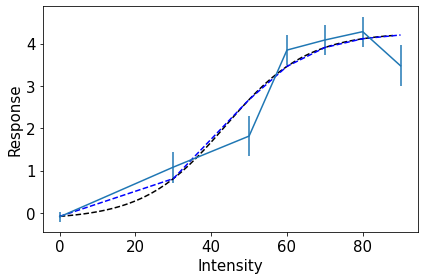

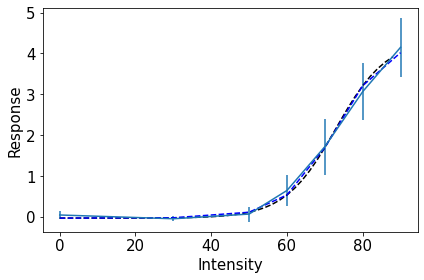

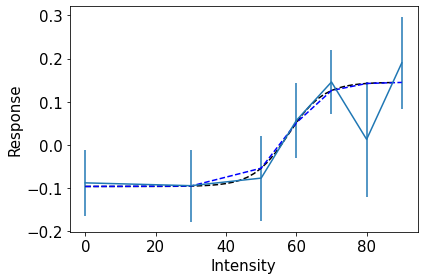

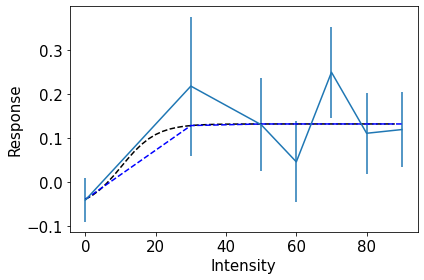

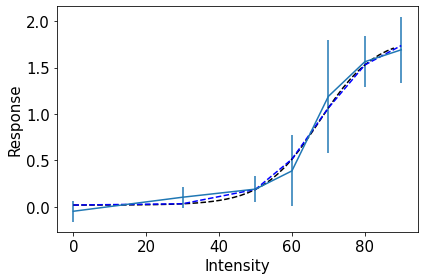

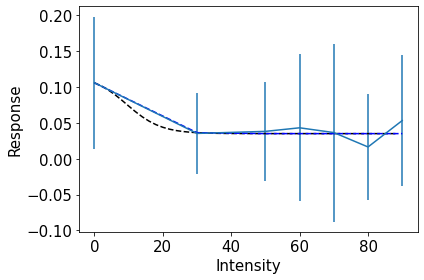

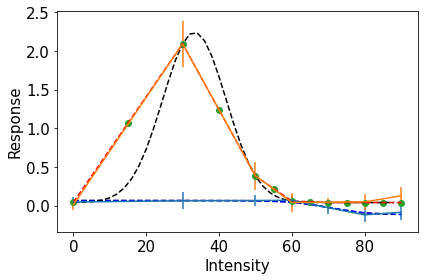

params [[2.03127228e+00]
 [4.73650392e+01]
 [6.59286091e+00]
 [5.18106691e-03]] MI 0.11799734911719523 Sound Positive? [ True] McFadden R-squared [0.04115786] Interpolated error 0.00723049278267465


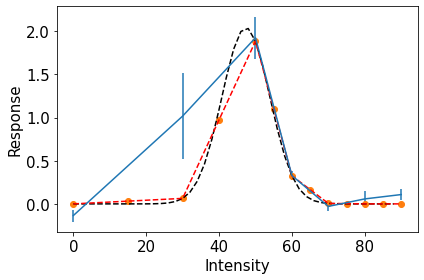

params [[ 4.47531514e-01]
 [ 5.27823724e+01]
 [ 6.29038974e+00]
 [-8.49730580e-04]] MI 0.20335392382000406 Sound Positive? [ True] McFadden R-squared [0.15542667] Interpolated error 0.14058780156533204


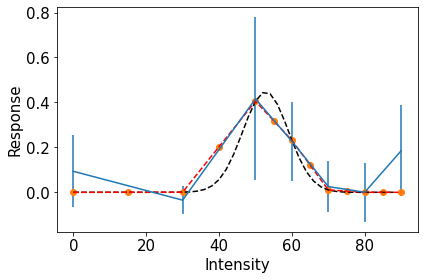

[-0.86617968 -0.07734688 69.53080617 -5.00006376]


/Users/janaki/Dropbox/project_with_melanie/DataForJanaki/utils.py:58: RuntimeWarning: overflow encountered in exp
  y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x));


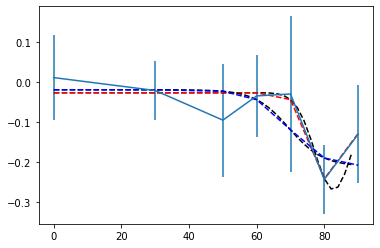

params [[ 0.68976593]
 [38.40026737]
 [13.76610317]
 [-0.10472156]] MI 0.3414717324105907 Sound Positive? [ True] McFadden R-squared [0.16702402] Interpolated error 0.07497122946894128


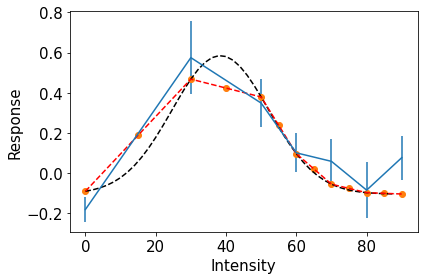

params [[-3.43651112e-01]
 [ 5.76375599e+01]
 [ 2.95284735e+01]
 [ 5.13457932e-02]] MI 0.4659848219141633 Sound Positive? [False] McFadden R-squared [0.15299211] Interpolated error 0.004230044631236764


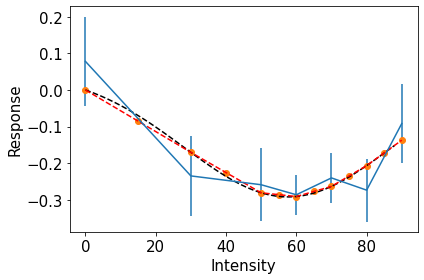

params [[2.63238657e-01]
 [6.23648930e+01]
 [5.83559770e+00]
 [4.89256360e-02]] MI 0.12271316039181514 Sound Positive? [ True] McFadden R-squared [0.16807912] Interpolated error 0.06474552321669075


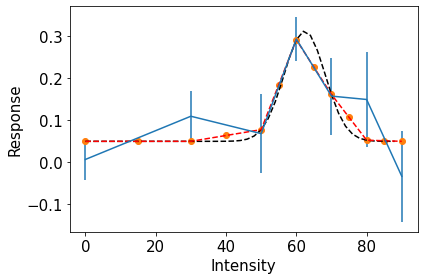

params [[ 0.5151619 ]
 [52.40403526]
 [10.83292793]
 [ 0.08325726]] MI 0.37359607625847163 Sound Positive? [ True] McFadden R-squared [0.15190503] Interpolated error 0.009296718362162427


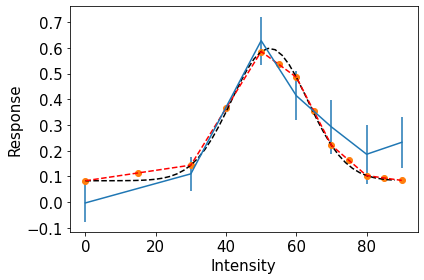

params [[-1.16359675e-01]
 [ 6.99126088e+01]
 [ 1.33378153e+01]
 [ 3.55403123e-02]] MI 0.07054196949305913 Sound Positive? [False] McFadden R-squared [0.10585835] Interpolated error 0.008982526879479449


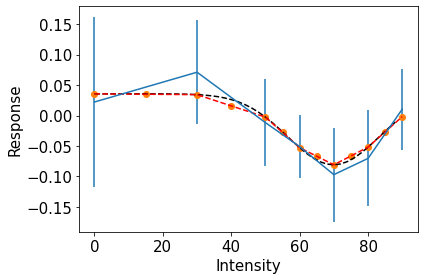

params [[ 6.39495818e-01]
 [ 4.31411226e+01]
 [ 1.03042942e+01]
 [-5.63820084e-03]] MI 0.2805960467770514 Sound Positive? [ True] McFadden R-squared [0.10920549] Interpolated error 0.16515344372874005


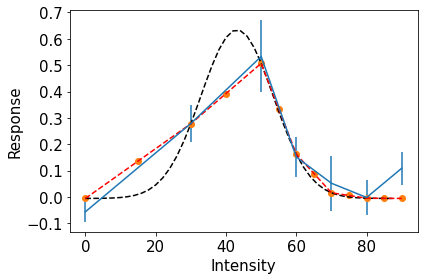

params [[6.56363176e-01]
 [4.87566346e+01]
 [9.56690663e+00]
 [2.20403447e-02]] MI 0.1240541576892707 Sound Positive? [ True] McFadden R-squared [0.09184735] Interpolated error 0.015514370815004576


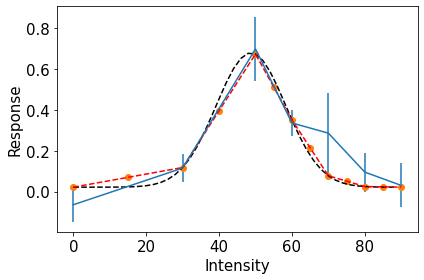

params [[-0.22496042]
 [64.9093223 ]
 [ 9.34827698]
 [ 0.09013103]] MI 0.23163073638995899 Sound Positive? [False] McFadden R-squared [0.13702158] Interpolated error 0.022468908715146157


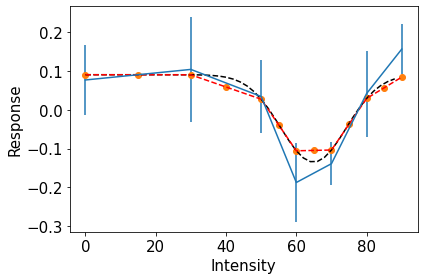

params [[-0.04576282]
 [ 2.79411668]
 [42.73049343]
 [ 7.05375474]] MI 1.0 Sound Positive? [ True] McFadden R-squared [0.00723909] Interpolated error 0.002500924008125699
params [[-0.01213474]
 [ 0.34965741]
 [ 4.62711138]
 [-5.00005929]] MI 0.8722996132846755 Sound Positive? [False] McFadden R-squared [0.06565536] Interpolated error 0.11275912864226664
params [[-4.70965844e-03]
 [ 6.31863418e-01]
 [ 8.73383372e+01]
 [ 5.52275451e+00]] MI 0.7716349045862029 Sound Positive? [ True] McFadden R-squared [0.16114644] Interpolated error 0.0026454525573734
params [[ 0.07508168]
 [ 2.50366228]
 [71.69105267]
 [ 5.53322193]] MI 0.9559626450447849 Sound Positive? [ True] McFadden R-squared [0.01082776] Interpolated error 0.0017089827341893447
params [[ -2.3326586 ]
 [  3.48190682]
 [ 89.68689985]
 [159.52495749]] MI 1.0 Sound Positive? [ True] McFadden R-squared [0.0995004] Interpolated error 3.0121116287317325e-06
params [[-0.15228813]
 [ 0.14108705]
 [33.77013871]
 [-5.53854032]] MI 0.86727243

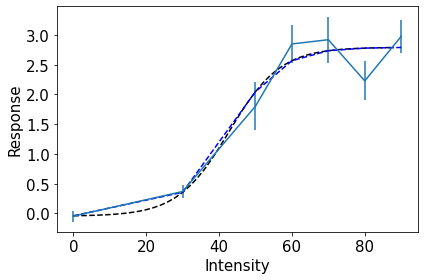

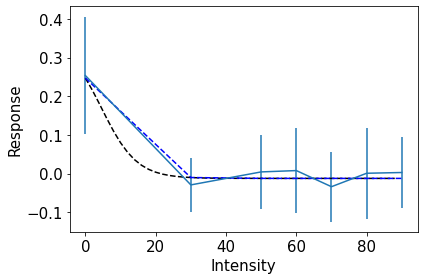

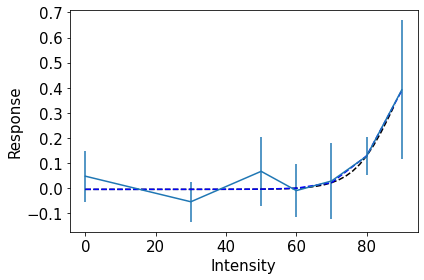

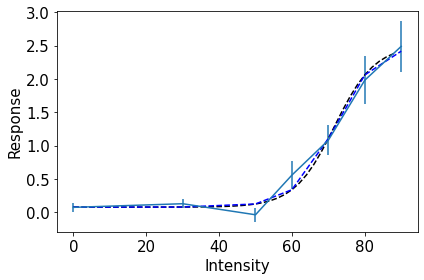

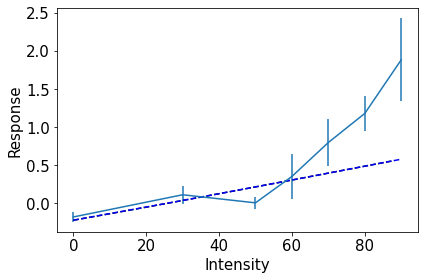

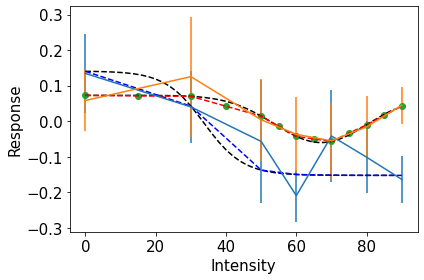

params [[ 3.88780261]
 [49.01672759]
 [ 9.88889124]
 [ 0.13707754]] MI 0.033549801398076805 Sound Positive? [ True] McFadden R-squared [0.00901744] Interpolated error 0.01506413554910724


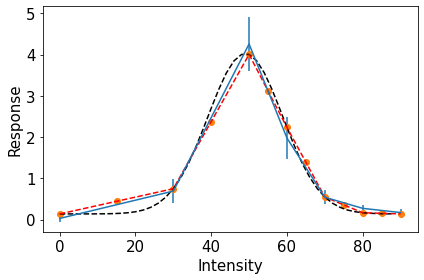

params [[ 0.39519225]
 [72.84434722]
 [25.62975012]
 [-0.07770577]] MI 0.6801975521178452 Sound Positive? [ True] McFadden R-squared [0.08354805] Interpolated error 0.002950909162172633


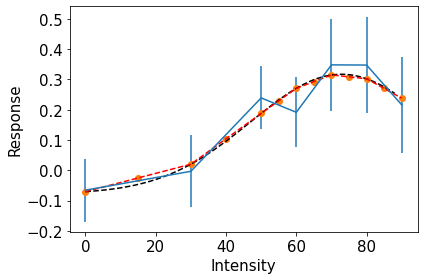

/Users/janaki/Dropbox/project_with_melanie/DataForJanaki/utils.py:58: RuntimeWarning: overflow encountered in exp
  y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x));


[ 0.12366824  0.93693871 63.36112374  7.18295291]


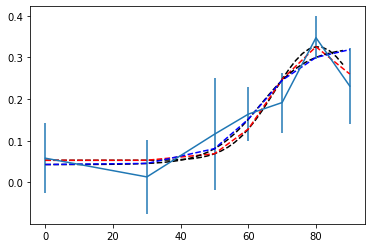

params [[2.63446198e-01]
 [6.73220131e+01]
 [4.20860249e+00]
 [5.75389099e-03]] MI 0.05943326731952371 Sound Positive? [ True] McFadden R-squared [0.0357843] Interpolated error 0.21147976832462115


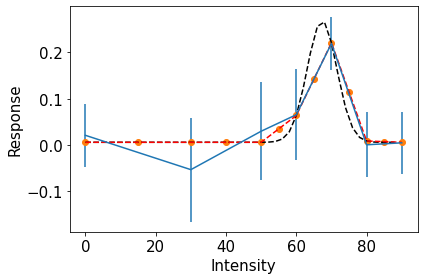

params [[6.65182202e-01]
 [4.59007721e+01]
 [8.55255809e+00]
 [1.40737651e-02]] MI 0.018901664970639196 Sound Positive? [ True] McFadden R-squared [0.15800922] Interpolated error 0.07677657140556857


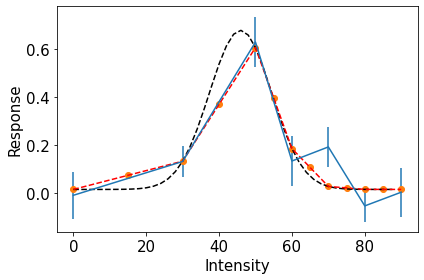

params [[ -0.11524082]
 [  0.61447767]
 [  1.44293407]
 [-26.30464644]] MI 1.0 Sound Positive? [False] McFadden R-squared [0.11794143] Interpolated error 0.0005211254139949347
params [[  -0.3856251 ]
 [   0.74300983]
 [  64.84791431]
 [-125.42375836]] MI 1.0 Sound Positive? [False] McFadden R-squared [0.12616848] Interpolated error 3.437026384759333e-06
params [[-0.17258373]
 [ 0.20679764]
 [59.49906139]
 [-7.89830373]] MI 0.6290023727199429 Sound Positive? [False] McFadden R-squared [0.05599278] Interpolated error 0.001737692618509732
params [[ -0.13867684]
 [  0.47373343]
 [ 51.85039046]
 [-22.15913753]] MI 0.8201791674228632 Sound Positive? [False] McFadden R-squared [0.12061249] Interpolated error 0.0006304751687625848
params [[ 2.81351365e-01]
 [ 5.94358361e+01]
 [ 2.05109591e+01]
 [-4.63493077e-02]] MI 0.6545306043183181 Sound Positive? [ True] McFadden R-squared [0.13427958] Interpolated error 0.00791514456573272


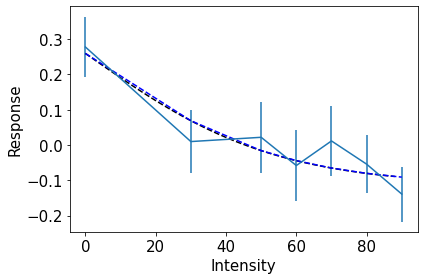

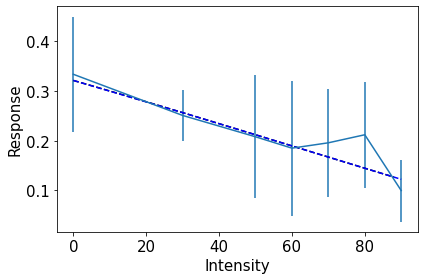

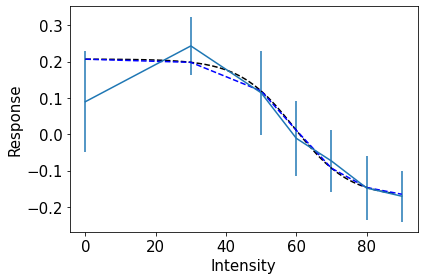

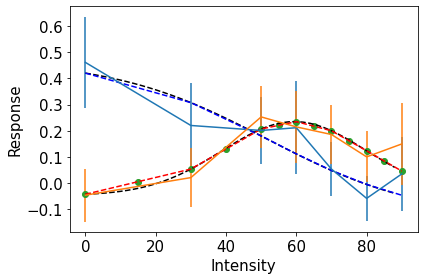

params [[2.50455176e-01]
 [5.78794871e+01]
 [6.09053527e+00]
 [3.94961392e-03]] MI 0.058529657460630734 Sound Positive? [ True] McFadden R-squared [0.07332982] Interpolated error 0.07310098117385004


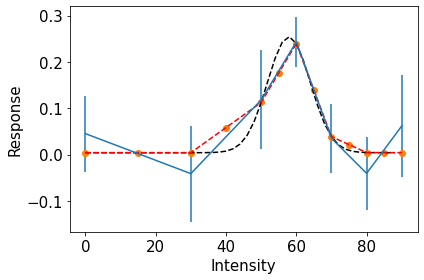

params [[ 0.30337   ]
 [17.46446742]
 [13.29291135]
 [ 0.04208247]] MI 0.46259518885137074 Sound Positive? [ True] McFadden R-squared [0.17299116] Interpolated error 0.31806555686423427


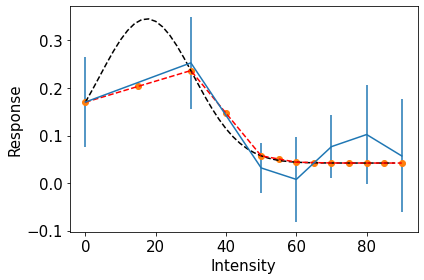

In [5]:
"""
Plotting using average and sem the raw data and comparing against the fitted model
"""

[gaussNoLightParametersArray, 
cntGaussNoLightPositive, 
interpolatedErrorGaussNoLight, 
gaussNoLightDatasetIndex,
gaussNoLightCellIndex, 
sigmoidNoLightParametersArray,
sigmoidNoLightY0Array, sigmoidNoLightY90Array, 
cntSigmoidNoLightPositive, 
interpolatedErrorSigmoidNoLight,
sigmoidNoLightDatasetIndex,
sigmoidNoLightCellIndex] = fittingStatisticsGauss(responseMatrix = responseFunctionMat,
                                                  num_cells=num_cells,
                                                  lightCondition = 'no',
                                                  listGaussAllConds = listNoLightGaussAllConds,
                                                  listGaussAllCondsStart = listNoLightGaussAllCondsStart,
                                                  dictGaussFitParams = dictNoLightGaussLowRSquaredFitParams,
                                                  dictGaussIndices = dictNoLightGaussLowRSquared,
                                                  dictGaussRSquaredValues = dictNoLightGaussLowRSquaredValues,
                                                  listSigmoidAllConds = listNoLightSigmoidAllConds,
                                                  listSigmoidAllCondsStart = listNoLightSigmoidAllCondsStart,
                                                  dictSigmoidFitParams = dictNoLightSigmoidLowRSquaredFitParams,
                                                  dictSigmoidIndices = dictNoLightSigmoidLowRSquared,
                                                  dictSigmoidRSquaredValues = dictNoLightSigmoidLowRSquaredValues)

[gaussMidLightParametersArray, 
cntGaussMidLightPositive, 
interpolatedErrorGaussMidLight, 
gaussMidLightDatasetIndex,
gaussMidLightCellIndex,
sigmoidMidLightParametersArray, 
sigmoidMidLightY0Array, sigmoidMidLightY90Array,  
cntSigmoidMidLightPositive, 
interpolatedErrorSigmoidMidLight,
sigmoidMidLightDatasetIndex,
sigmoidMidLightCellIndex]  = fittingStatisticsGauss(responseMatrix = responseFunctionMat,
                                                   num_cells=num_cells,
                                                  lightCondition = 'mid',
                                                  listGaussAllConds = listMidLightGaussAllConds,
                                                  listGaussAllCondsStart = listMidLightGaussAllCondsStart,
                                                  dictGaussFitParams = dictMidLightGaussLowRSquaredFitParams,
                                                  dictGaussIndices = dictMidLightGaussLowRSquared,
                                                  dictGaussRSquaredValues = dictMidLightGaussLowRSquaredValues,
                                                  listSigmoidAllConds = listMidLightSigmoidAllConds,
                                                  listSigmoidAllCondsStart = listMidLightSigmoidAllCondsStart,
                                                  dictSigmoidFitParams = dictMidLightSigmoidLowRSquaredFitParams,
                                                  dictSigmoidIndices = dictMidLightSigmoidLowRSquared,
                                                  dictSigmoidRSquaredValues = dictMidLightSigmoidLowRSquaredValues)  

[gaussHighLightParametersArray, 
cntGaussHighLightPositive, 
interpolatedErrorGaussHighLight, 
gaussHighLightDatasetIndex,
gaussHighLightCellIndex,
sigmoidHighLightParametersArray,
sigmoidHighLightY0Array, sigmoidHighLightY90Array, 
cntSigmoidHighLightPositive, 
interpolatedErrorSigmoidHighLight,
sigmoidHighLightDatasetIndex,
sigmoidHighLightCellIndex] = fittingStatisticsGauss(responseMatrix = responseFunctionMat,
                                                    num_cells=num_cells,
                                                  lightCondition = 'high',
                                                  listGaussAllConds = listHighLightGaussAllConds,
                                                  listGaussAllCondsStart = listHighLightGaussAllCondsStart,
                                                  dictGaussFitParams = dictHighLightGaussLowRSquaredFitParams,
                                                  dictGaussIndices = dictHighLightGaussLowRSquared,
                                                  dictGaussRSquaredValues = dictHighLightGaussLowRSquaredValues,
                                                  listSigmoidAllConds = listHighLightSigmoidAllConds,
                                                  listSigmoidAllCondsStart = listHighLightSigmoidAllCondsStart,
                                                  dictSigmoidFitParams = dictHighLightSigmoidLowRSquaredFitParams,
                                                  dictSigmoidIndices = dictHighLightSigmoidLowRSquared,
                                                  dictSigmoidRSquaredValues = dictHighLightSigmoidLowRSquaredValues)  


In [ ]:
"""
Creating .mat files with dataset number, cell number and fitting parameter values for Melanie.
"""
gaussNoLightSST = np.zeros((len(gaussNoLightDatasetIndex),7))
gaussNoLightSST[:,0] = gaussNoLightDatasetIndex
gaussNoLightSST[:,1] = gaussNoLightCellIndex
gaussNoLightSST[:,2:6] = gaussNoLightParametersArray.T
gaussNoLightSST[:,-1] = interpolatedErrorGaussNoLight

indices = [0,3,6,9,12,15,18]
avg_Response = responseFunctionMat['Ind_CellSelectionIncludingSEM'][int(gaussNoLightDatasetIndex[0]),0][indices,int(gaussNoLightCellIndex[0])]
sem_Response = responseFunctionMat['Ind_CellSelectionIncludingSEM'][int(gaussNoLightDatasetIndex[0]),1][indices,int(gaussNoLightCellIndex[0])]
plt.errorbar(amplitude, avg_Response, yerr=sem_Response)
[amp0,mean0,std0,shift] = gaussNoLightParametersArray[:,0]  
y = shift + amp0*np.exp(-(amplitude-mean0)**2/(2*std0**2))
plt.plot(amplitude, y,'r--') 

gaussMidLightSST = np.zeros((len(gaussMidLightDatasetIndex),7))
gaussMidLightSST[:,0] = gaussMidLightDatasetIndex
gaussMidLightSST[:,1] = gaussMidLightCellIndex
gaussMidLightSST[:,2:6] = gaussMidLightParametersArray.T
gaussMidLightSST[:,-1] = interpolatedErrorGaussMidLight

gaussHighLightSST = np.zeros((len(gaussHighLightDatasetIndex),7))
gaussHighLightSST[:,0] = gaussHighLightDatasetIndex
gaussHighLightSST[:,1] = gaussHighLightCellIndex
gaussHighLightSST[:,2:6] = gaussHighLightParametersArray.T
gaussHighLightSST[:,-1] = interpolatedErrorGaussHighLight

mdic = {"gaussNoLightSST": gaussNoLightSST, "gaussMidLightSST": gaussMidLightSST, "gaussHighLightSST": gaussHighLightSST}
#scipy.io.savemat("matFilesForMelanie/gaussianFitSST_includingIntercept.mat",mdic)

sigmoidNoLightSST = np.zeros((len(sigmoidNoLightDatasetIndex),7))
sigmoidNoLightSST[:,0] = sigmoidNoLightDatasetIndex
sigmoidNoLightSST[:,1] = sigmoidNoLightCellIndex
sigmoidNoLightSST[:,2:6] = sigmoidNoLightParametersArray.T
sigmoidNoLightSST[:,-1] = interpolatedErrorSigmoidNoLight

indices = [0,3,6,9,12,15,18]
avg_Response = responseFunctionMat['Ind_CellSelectionIncludingSEM'][int(sigmoidNoLightDatasetIndex[10]),0][indices,int(sigmoidNoLightCellIndex[10])]
sem_Response = responseFunctionMat['Ind_CellSelectionIncludingSEM'][int(sigmoidNoLightDatasetIndex[10]),1][indices,int(sigmoidNoLightCellIndex[10])]
plt.errorbar(amplitude, avg_Response, yerr=sem_Response)
[y0,ymax,x0,delta_x] = sigmoidNoLightParametersArray[:,10]  
y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x))
plt.plot(amplitude, y,'r--') 

sigmoidMidLightSST = np.zeros((len(sigmoidMidLightDatasetIndex),7))
sigmoidMidLightSST[:,0] = sigmoidMidLightDatasetIndex
sigmoidMidLightSST[:,1] = sigmoidMidLightCellIndex
sigmoidMidLightSST[:,2:6] = sigmoidMidLightParametersArray.T
sigmoidMidLightSST[:,-1] = interpolatedErrorSigmoidMidLight

sigmoidHighLightSST = np.zeros((len(sigmoidHighLightDatasetIndex),7))
sigmoidHighLightSST[:,0] = sigmoidHighLightDatasetIndex
sigmoidHighLightSST[:,1] = sigmoidHighLightCellIndex
sigmoidHighLightSST[:,2:6] = sigmoidHighLightParametersArray.T
sigmoidHighLightSST[:,-1] = interpolatedErrorSigmoidHighLight

mdic = {"sigmoidNoLightSST": sigmoidNoLightSST, "sigmoidMidLightSST": sigmoidMidLightSST, "sigmoidHighLightSST": sigmoidHighLightSST}
#scipy.io.savemat("matFilesForMelanie/sigmoidFitSST_new.mat",mdic)


In [ ]:
"""
Distributions of parameters
"""

"""
how to get pdf from sns.distplot
ax1 = sns.distplot(x, ax=axs[0], label='KDE pdf')
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
"""
plt.figure(tight_layout=True)
noLightSigmoidSelected = np.where(interpolatedErrorSigmoidNoLight<=0.05)[0]
sns.distplot(sigmoidNoLightParametersArray[2,noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
midLightSigmoidSelected = np.where(interpolatedErrorSigmoidMidLight<=0.05)[0]
sns.distplot(sigmoidMidLightParametersArray[2,midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
highLightSigmoidSelected = np.where(interpolatedErrorSigmoidHighLight<=0.05)[0]
sns.distplot(sigmoidHighLightParametersArray[2,highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('x0 for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_x0_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightParametersArray[2,noLightSigmoidSelected]
         [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightParametersArray[2,midLightSigmoidSelected]
         [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightParametersArray[2,highLightSigmoidSelected]
         [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_x0_soundPositive')
plt.show()
ksX0SoundPositive_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightParametersArray[2,midLightSigmoidSelected]
                                                 [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
                                                 sigmoidNoLightParametersArray[2,noLightSigmoidSelected]
                                                 [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
ksX0SoundPositive_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightParametersArray[2,highLightSigmoidSelected]
                                                  [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
                                                  sigmoidNoLightParametersArray[2,noLightSigmoidSelected]
                                                  [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
print(f"x0_soundPositive, mid vs no {ksX0SoundPositive_noVsMid}, high vs no {ksX0SoundPositive_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightParametersArray[2,noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightParametersArray[2,midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightParametersArray[2,highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('x0 for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_x0_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightParametersArray[2,noLightSigmoidSelected]
         [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightParametersArray[2,midLightSigmoidSelected]
         [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightParametersArray[2,highLightSigmoidSelected]
         [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_x0_soundNegative')
plt.show()
ksX0SoundNegative_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightParametersArray[2,midLightSigmoidSelected]
                                                 [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
                                                 sigmoidNoLightParametersArray[2,noLightSigmoidSelected]
                                                 [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
ksX0SoundNegative_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightParametersArray[2,highLightSigmoidSelected]
                                                  [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
                                                  sigmoidNoLightParametersArray[2,noLightSigmoidSelected]
                                                  [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
print(f"x0_soundNegative, mid vs no {ksX0SoundNegative_noVsMid}, high vs no {ksX0SoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightY0Array[noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightY0Array[midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightY0Array[highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('y0dB for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_y0dB_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightY0Array[noLightSigmoidSelected]
         [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightY0Array[midLightSigmoidSelected]
         [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightY0Array[highLightSigmoidSelected]
         [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_y0dB_soundPositive')
plt.show()
ks_y0dBSoundPositive_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightY0Array[midLightSigmoidSelected]
                                                    [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
                                                    sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                    [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
ks_y0dBSoundPositive_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightY0Array[highLightSigmoidSelected]
                                                     [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
                                                     sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                     [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
print(f"y0dB_soundPositive, mid vs no {ks_y0dBSoundPositive_noVsMid}, high vs no {ks_y0dBSoundPositive_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightY0Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightY0Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightY0Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('y0dB for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_y0dB_soundNegative')
fig,ax1=plt.subplots(1,1,figsize=(10,5),tight_layout=True,sharex=True)
ax1.hist(sigmoidNoLightY0Array[noLightSigmoidSelected]
         [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0],
         bins=int(50), density=True, color='black')  # density=False would make counts
#plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax1.hist(sigmoidMidLightY0Array[midLightSigmoidSelected]
         [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0],
           bins=int(50), density=True, color='salmon')
#plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax1.hist(sigmoidHighLightY0Array[highLightSigmoidSelected]
         [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_y0dB_soundNegative')
plt.show()
ks_y0dBSoundNegative_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightY0Array[midLightSigmoidSelected]
                                                    [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
                                                    sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                    [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
ks_y0dBSoundNegative_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightY0Array[highLightSigmoidSelected]
                                                     [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
                                                     sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                     [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
print(f"y0dB_soundNegative, mid vs no {ks_y0dBSoundNegative_noVsMid}, high vs no {ks_y0dBSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightY90Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightY90Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightY90Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('y_90dB for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_y90dB_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightY90Array[noLightSigmoidSelected]
         [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightY90Array[midLightSigmoidSelected]
         [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightY90Array[highLightSigmoidSelected]
         [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_y90dB_soundPositive')
plt.show()
ks_y90dBSoundPositive_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightY90Array[midLightSigmoidSelected]
                                                    [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
                                                    sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                    [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
ks_y90dBSoundPositive_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightY90Array[highLightSigmoidSelected]
                                                     [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
                                                     sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                     [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
print(f"y90dB_soundPositive, mid vs no {ks_y90dBSoundPositive_noVsMid}, high vs no {ks_y90dBSoundPositive_noVsHigh}")


plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightY90Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightY90Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightY90Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('y_90dB for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_y90dB_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightY90Array[noLightSigmoidSelected]
         [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightY90Array[midLightSigmoidSelected]
         [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightY90Array[highLightSigmoidSelected]
         [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_y90dB_soundNegative')
plt.show()
ks_y90dBSoundNegative_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightY90Array[midLightSigmoidSelected]
                                                    [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
                                                    sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                    [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
ks_y90dBSoundNegative_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightY90Array[highLightSigmoidSelected]
                                                     [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
                                                     sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                     [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
print(f"y90dB_soundNegative, mid vs no {ks_y90dBSoundNegative_noVsMid}, high vs no {ks_y90dBSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightY90Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0]-
             sigmoidNoLightY0Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0],
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightY90Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0]-
             sigmoidMidLightY0Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0],
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightY90Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0]-
             sigmoidHighLightY0Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('y range for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_yRange_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightY90Array[noLightSigmoidSelected]
        [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0]-
        sigmoidNoLightY0Array[noLightSigmoidSelected]
        [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightY90Array[midLightSigmoidSelected]
        [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0]-
        sigmoidMidLightY0Array[midLightSigmoidSelected]
        [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightY90Array[highLightSigmoidSelected]
        [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0]-
        sigmoidHighLightY0Array[highLightSigmoidSelected]
        [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_yrange_soundPositive')
plt.show()
ks_yRangeSoundPositive_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightY90Array[midLightSigmoidSelected]
                                                      [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0]-
                                                      sigmoidMidLightY0Array[midLightSigmoidSelected]
                                                      [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
                                                      sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0]-
                                                      sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
ks_yRangeSoundPositive_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightY90Array[highLightSigmoidSelected]
                                                      [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0]-
                                                      sigmoidHighLightY0Array[highLightSigmoidSelected]
                                                      [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
                                                      sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0]-
                                                      sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
print(f"yRange_soundPositive, mid vs no {ks_yRangeSoundPositive_noVsMid}, high vs no {ks_yRangeSoundPositive_noVsHigh}")


plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightY90Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0]-
             sigmoidNoLightY0Array[noLightSigmoidSelected]
             [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightY90Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0]-
             sigmoidMidLightY0Array[midLightSigmoidSelected]
             [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightY90Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0]-
             sigmoidHighLightY0Array[highLightSigmoidSelected]
             [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('y range for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_yRange_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightY90Array[noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0]-
        sigmoidNoLightY0Array[noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0],
         bins=int(50), density=True, color='black')  # density=False would make counts
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightY90Array[midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0]-
        sigmoidMidLightY0Array[midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0],
           bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightY90Array[highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0]-
        sigmoidHighLightY0Array[highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
         bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_yrange_soundNegative')
plt.show()
ks_yRangeSoundNegative_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightY90Array[midLightSigmoidSelected]
                                                      [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0]-
                                                      sigmoidMidLightY0Array[midLightSigmoidSelected]
                                                      [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
                                                      sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0]-
                                                      sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
ks_yRangeSoundNegative_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightY90Array[highLightSigmoidSelected]
                                                      [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0]-
                                                      sigmoidHighLightY0Array[highLightSigmoidSelected]
                                                      [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
                                                      sigmoidNoLightY90Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0]-
                                                      sigmoidNoLightY0Array[noLightSigmoidSelected]
                                                      [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
print(f"yRange_soundNegative, mid vs no {ks_yRangeSoundNegative_noVsMid}, high vs no {ks_yRangeSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightParametersArray[3,noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightParametersArray[3,midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightParametersArray[3,highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('delta_x for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_deltaX_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightParametersArray[3,noLightSigmoidSelected]
        [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0], 
        bins=int(50), density=True, color='black')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]
        [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
        bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]
        [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
        bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_deltaX_soundPositive')
plt.show()
ks_deltaXSoundPositive_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]
                                                    [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0], 
                                                    sigmoidNoLightParametersArray[3,noLightSigmoidSelected]
                                                    [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
ks_deltaXSoundPositive_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]
                                                     [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0], 
                                                     sigmoidNoLightParametersArray[3,noLightSigmoidSelected]
                                                     [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0])
print(f"deltaX_soundPositive, mid vs no {ks_deltaXSoundPositive_noVsMid}, high vs no {ks_deltaXSoundPositive_noVsHigh}")


plt.figure(tight_layout=True)
sns.distplot(sigmoidNoLightParametersArray[3,noLightSigmoidSelected][sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidMidLightParametersArray[3,midLightSigmoidSelected][sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(sigmoidHighLightParametersArray[3,highLightSigmoidSelected][sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('delta_x for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_deltaX_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(sigmoidNoLightParametersArray[3,noLightSigmoidSelected]
        [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0], 
        bins=int(50), density=True, color='black')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]
        [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
        bins=int(50), density=True, color='salmon')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]
        [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
        bins=int(50), density=True, color='red')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_deltaX_soundNegative')
plt.show()
ks_deltaXSoundNegative_noVsMid = scipy.stats.ks_2samp(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]
                                                    [sigmoidMidLightParametersArray[3,midLightSigmoidSelected]<0], 
                                                    sigmoidNoLightParametersArray[3,noLightSigmoidSelected]
                                                    [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
ks_deltaXSoundNegative_noVsHigh = scipy.stats.ks_2samp(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]
                                                     [sigmoidHighLightParametersArray[3,highLightSigmoidSelected]<0], 
                                                     sigmoidNoLightParametersArray[3,noLightSigmoidSelected]
                                                     [sigmoidNoLightParametersArray[3,noLightSigmoidSelected]<0])
print(f"deltaX_soundNegative, mid vs no {ks_deltaXSoundNegative_noVsMid}, high vs no {ks_deltaXSoundNegative_noVsHigh}")


In [ ]:
plt.figure(tight_layout=True)
noLightGaussSelected = np.where(interpolatedErrorGaussNoLight<=0.25)[0]
sns.distplot(gaussNoLightParametersArray[0,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
midLightGaussSelected = np.where(interpolatedErrorGaussMidLight<0.25)[0]
sns.distplot(gaussMidLightParametersArray[0,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
highLightGaussSelected = np.where(interpolatedErrorGaussHighLight<=0.25)[0]
sns.distplot(gaussHighLightParametersArray[0,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Amplitude for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_amplitude_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[0,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[0,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[0,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_amplitude_soundPositive')
plt.show()
ks_ampSoundPositive_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[0,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
                                                    gaussNoLightParametersArray[0,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
ks_ampSoundPositive_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[0,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
                                                     gaussNoLightParametersArray[0,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
print(f"amp_soundPositive, mid vs no {ks_ampSoundPositive_noVsMid}, high vs no {ks_ampSoundPositive_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[0,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[0,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[0,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Amplitude for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_amplitude_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[0,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[0,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[0,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_amplitude_soundNegative')
plt.show()
ks_ampSoundNegative_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[0,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
                                                    gaussNoLightParametersArray[0,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
ks_ampSoundNegative_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[0,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
                                                     gaussNoLightParametersArray[0,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
print(f"amp_soundNegative, mid vs no {ks_ampSoundNegative_noVsMid}, high vs no {ks_ampSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[1,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[1,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[1,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Mean for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_mean_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[1,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[1,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[1,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_mean_soundPositive')
plt.show()
ks_meanSoundPositive_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[1,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
                                                    gaussNoLightParametersArray[1,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
ks_meanSoundPositive_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[1,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
                                                     gaussNoLightParametersArray[1,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
print(f"mean_soundPositive, mid vs no {ks_meanSoundPositive_noVsMid}, high vs no {ks_meanSoundPositive_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[1,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[1,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[1,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Mean for sound negative',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_mean_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[1,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[1,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[1,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_mean_soundNegative')
plt.show()
ks_meanSoundNegative_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[1,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
                                                    gaussNoLightParametersArray[1,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
ks_meanSoundNegative_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[1,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
                                                     gaussNoLightParametersArray[1,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
print(f"mean_soundNegative, mid vs no {ks_meanSoundNegative_noVsMid}, high vs no {ks_meanSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[2,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[2,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[2,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Std for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_std_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[2,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[2,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[2,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_std_soundPositive')
plt.show()
ks_stdSoundPositive_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[2,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
                                                    gaussNoLightParametersArray[2,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
ks_stdSoundPositive_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[2,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
                                                     gaussNoLightParametersArray[2,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
print(f"std_soundPositive, mid vs no {ks_stdSoundPositive_noVsMid}, high vs no {ks_stdSoundPositive_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[2,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[2,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[2,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Std for sound negative',fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_std_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[2,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[2,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[2,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_std_soundNegative')
plt.show()
ks_stdSoundNegative_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[2,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
                                                    gaussNoLightParametersArray[2,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
ks_stdSoundNegative_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[2,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
                                                     gaussNoLightParametersArray[2,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
print(f"std_soundNegative, mid vs no {ks_stdSoundNegative_noVsMid}, high vs no {ks_stdSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[3,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[3,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[3,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Shift for sound positive',fontsize=15)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_shift_soundPositive')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[3,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]>0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[3,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[3,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_shift_soundPositive')
plt.show()
ks_shiftSoundPositive_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[3,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]>0], 
                                                    gaussNoLightParametersArray[3,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
ks_shiftSoundPositive_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[3,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]>0], 
                                                     gaussNoLightParametersArray[3,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]>0])
print(f"shift_soundPositive, mid vs no {ks_shiftSoundPositive_noVsMid}, high vs no {ks_shiftSoundPositive_noVsHigh}")

plt.figure(tight_layout=True)
sns.distplot(gaussNoLightParametersArray[3,noLightGaussSelected][gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussMidLightParametersArray[3,midLightGaussSelected][gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'salmon', 
             hist_kws={'edgecolor':'salmon'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
sns.distplot(gaussHighLightParametersArray[3,highLightGaussSelected][gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
             hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 1,'bw_method':0.2})
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.ylabel('Probability density function',fontsize=15)
plt.xlabel('Shift for sound negative',fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/pdfs_shift_soundNegative')
fig=plt.figure(figsize=(10,5),tight_layout=True)
ax=fig.add_subplot(3,1,1)
ax.hist(gaussNoLightParametersArray[3,noLightGaussSelected]
        [gaussNoLightParametersArray[0,noLightGaussSelected]<0], 
        bins=int(50), density=True, color='black') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,2)
ax.hist(gaussMidLightParametersArray[3,midLightGaussSelected]
        [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
        bins=int(50), density=True, color='salmon') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
ax=fig.add_subplot(3,1,3)
ax.hist(gaussHighLightParametersArray[3,highLightGaussSelected]
        [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
        bins=int(50), density=True, color='red') 
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/histograms_shift_soundNegative')
plt.show()
ks_shiftSoundNegative_noVsMid = scipy.stats.ks_2samp(gaussMidLightParametersArray[3,midLightGaussSelected]
                                                    [gaussMidLightParametersArray[0,midLightGaussSelected]<0], 
                                                    gaussNoLightParametersArray[3,noLightGaussSelected]
                                                    [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
ks_shiftSoundNegative_noVsHigh = scipy.stats.ks_2samp(gaussHighLightParametersArray[3,highLightGaussSelected]
                                                     [gaussHighLightParametersArray[0,highLightGaussSelected]<0], 
                                                     gaussNoLightParametersArray[3,noLightGaussSelected]
                                                     [gaussNoLightParametersArray[0,noLightGaussSelected]<0])
print(f"shift_soundNegative, mid vs no {ks_stdSoundNegative_noVsMid}, high vs no {ks_stdSoundNegative_noVsHigh}")

plt.figure(tight_layout=True)
plt.hist(interpolatedErrorSigmoidNoLight,bins=30,cumulative=True)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.ylabel('Number of cells',fontsize=15)
plt.xlabel('Error in interpolated curve for sigmoid fits',fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/Interpolated_error_of_sigmoid_fits_cumulative_plot')

plt.figure(tight_layout=True)
plt.hist(interpolatedErrorGaussNoLight,bins=30,cumulative=True)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.ylabel('Number of cells',fontsize=15)
plt.xlabel('Error in interpolated curve for gauss fits',fontsize=15)
#plt.savefig('Across_many_datasets/som/singleCellFits/Interpolated_error_of_gaussian_fits_cumulative_plot')



In [ ]:
print(sum(interpolatedErrorGaussNoLight<0.25)/len(interpolatedErrorGaussNoLight))
print(sum(interpolatedErrorSigmoidNoLight<0.05)/len(interpolatedErrorSigmoidNoLight))
print(sum(interpolatedErrorGaussMidLight<0.25)/len(interpolatedErrorGaussMidLight))
print(sum(interpolatedErrorSigmoidMidLight<0.05)/len(interpolatedErrorSigmoidMidLight))
print(sum(interpolatedErrorGaussHighLight<0.25)/len(interpolatedErrorGaussHighLight))
print(sum(interpolatedErrorSigmoidHighLight<0.05)/len(interpolatedErrorSigmoidHighLight))


In [ ]:
    
"""
Analysis I:  counting total number of monotonic and non-monotonic cells across light conditions.
Plotting changes in percentages of sound +ve and -ve cells across the monotonic and non-monotonic conditions.
"""
totalCellsAcrossDatasets = 0
for iData in range(len(responseFunctionMat["Ind_CellSelectionIncludingSEM"])):
    totalCellsAcrossDatasets += np.size(responseFunctionMat['Ind_CellSelectionIncludingSEM'][iData,0],1)
print("Total number of cells for any light condition = ", totalCellsAcrossDatasets)
print("Number of non-monotonic cells in no light condition = ", len(noLightGaussSelected))
print("Number of monotonic cells in no light condition = ", len(noLightSigmoidSelected))
print("Number of non-monotonic cells in mid light condition = ", len(midLightGaussSelected))
print("Number of monotonic cells in mid light condition = ", len(midLightSigmoidSelected))
print("Number of non-monotonic cells in high light condition = ", len(highLightGaussSelected))
print("Number of monotonic cells in high light condition = ", len(highLightSigmoidSelected))

print(f"In no light {sum(gaussNoLightParametersArray[0,noLightGaussSelected]>0)} gauss +ve cells \
      and {len(noLightGaussSelected)-sum(gaussNoLightParametersArray[0,noLightGaussSelected]>0)} -ve cells")
print(f"In no light {sum(sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0)} sigmoid +ve cells \
      and {len(noLightSigmoidSelected)-sum(sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0)} -ve cells")
print(f"In mid light {sum(gaussMidLightParametersArray[0,midLightGaussSelected]>0)} gauss +ve cells \
      and {len(midLightGaussSelected)-sum(gaussMidLightParametersArray[0,midLightGaussSelected]>0)} -ve cells")
print(f"In mid light {sum(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0)} sigmoid +ve cells \
      and {len(midLightSigmoidSelected)-sum(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0)} -ve cells")
print(f"In high light {sum(gaussHighLightParametersArray[0,highLightGaussSelected]>0)} gauss +ve cells \
      and {len(highLightGaussSelected)-sum(gaussHighLightParametersArray[0,highLightGaussSelected]>0)} -ve cells")
print(f"In high light {sum(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0)} sigmoid +ve cells \
      and {len(highLightSigmoidSelected)-sum(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0)} -ve cells")

light_conds=['no light', 'mid light', 'high light']
x = np.arange(len(light_conds))  # the label locations
width = 0.4  # the width of the bars
fig, ax = plt.subplots(tight_layout=True)
ax.bar(x - width/2, [sum(gaussNoLightParametersArray[0,noLightGaussSelected]>0)/(len(noLightGaussSelected)), 
                     sum(gaussMidLightParametersArray[0,midLightGaussSelected]>0)/(len(midLightGaussSelected)),
                     sum(gaussHighLightParametersArray[0,highLightGaussSelected]>0)/(len(highLightGaussSelected))], 
       width, color='k')
ax.bar(x + width/2, [1-sum(gaussNoLightParametersArray[0,noLightGaussSelected]>0)/(len(noLightGaussSelected)), 
                     1-sum(gaussMidLightParametersArray[0,midLightGaussSelected]>0)/(len(midLightGaussSelected)),
                     1-sum(gaussHighLightParametersArray[0,highLightGaussSelected]>0)/(len(highLightGaussSelected))], width, color=[0.8,0.8,0.8])
plt.yticks(fontsize=15); plt.xticks(ticks=x,labels=light_conds,fontsize=15)
plt.ylabel('Fraction of all \nnon-monotonic cells', fontsize=15)
plt.xlabel('Light conditions', fontsize=15)
plt.savefig('Across_many_datasets/som/singleCellFits/Barplot_NonMonotonicCells')

fig, ax = plt.subplots(tight_layout=True)
ax.bar(x - width/2, [sum(sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0)/(len(noLightSigmoidSelected)), 
                     sum(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0)/(len(midLightSigmoidSelected)),
                     sum(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0)/(len(highLightSigmoidSelected))], width, color='k')
ax.bar(x + width/2, [1-sum(sigmoidNoLightParametersArray[3,noLightSigmoidSelected]>0)/(len(noLightSigmoidSelected)), 
                     1-sum(sigmoidMidLightParametersArray[3,midLightSigmoidSelected]>0)/(len(midLightSigmoidSelected)),
                     1-sum(sigmoidHighLightParametersArray[3,highLightSigmoidSelected]>0)/(len(highLightSigmoidSelected))], width, color=[0.8,0.8,0.8])
plt.yticks(fontsize=15); plt.xticks(ticks=x,labels=light_conds,fontsize=15)
plt.ylabel('Fraction of all monotonic cells', fontsize=15)
plt.xlabel('Light conditions', fontsize=15)
plt.savefig('Across_many_datasets/som/singleCellFits/Barplot_MonotonicCells')

"""
Analysis II: how does the nature of cells change across light conditions
"""
plt.figure()
cnt=0
for iData in range(num_cells):
    behaviourInLight = np.zeros((np.size(responseFunctionMat['Ind_CellSelectionIncludingSEM'][iData,0],1),3))
    behaviourInLight[(gaussNoLightCellIndex[gaussNoLightDatasetIndex==iData]).astype(int),0]=2
    behaviourInLight[(sigmoidNoLightCellIndex[sigmoidNoLightDatasetIndex==iData]).astype(int),0]=1
    behaviourInLight[(gaussMidLightCellIndex[gaussMidLightDatasetIndex==iData]).astype(int),1]=2
    behaviourInLight[(sigmoidMidLightCellIndex[sigmoidMidLightDatasetIndex==iData]).astype(int),1]=1
    behaviourInLight[(gaussHighLightCellIndex[gaussHighLightDatasetIndex==iData]).astype(int),2]=2
    behaviourInLight[(sigmoidHighLightCellIndex[sigmoidHighLightDatasetIndex==iData]).astype(int),2]=1
    
    signResponse = np.zeros((np.size(responseFunctionMat['Ind_CellSelectionIncludingSEM'][iData,0],1),3))
    signResponse[(gaussNoLightCellIndex[gaussNoLightDatasetIndex==iData]).astype(int),0]=(gaussNoLightParametersArray[0,gaussNoLightDatasetIndex==iData]>0)
    signResponse[(sigmoidNoLightCellIndex[sigmoidNoLightDatasetIndex==iData]).astype(int),0]=(sigmoidNoLightParametersArray[3,sigmoidNoLightDatasetIndex==iData]>0)
    signResponse[(gaussMidLightCellIndex[gaussMidLightDatasetIndex==iData]).astype(int),1]=(gaussMidLightParametersArray[0,gaussMidLightDatasetIndex==iData]>0)
    signResponse[(sigmoidMidLightCellIndex[sigmoidMidLightDatasetIndex==iData]).astype(int),1]=(sigmoidMidLightParametersArray[3,sigmoidMidLightDatasetIndex==iData]>0)
    signResponse[(gaussHighLightCellIndex[gaussHighLightDatasetIndex==iData]).astype(int),2]=(gaussHighLightParametersArray[0,gaussHighLightDatasetIndex==iData]>0)
    signResponse[(sigmoidHighLightCellIndex[sigmoidHighLightDatasetIndex==iData]).astype(int),2]=(sigmoidHighLightParametersArray[3,sigmoidHighLightDatasetIndex==iData]>0)
    
    cellsUnderConsideration = behaviourInLight*signResponse
    
    for iRow in range(len(behaviourInLight)):
        if (cellsUnderConsideration[iRow,0]==0 and cellsUnderConsideration[iRow,1]!=0 
            and cellsUnderConsideration[iRow,2]!=0):
            plt.plot([np.random.normal(0,0.08),np.random.normal(1,0.08),np.random.normal(2,0.08)],
                     [np.random.normal(behaviourInLight[iRow,0],0.08),
                      np.random.normal(behaviourInLight[iRow,1],0.08),
                      np.random.normal(behaviourInLight[iRow,2],0.08)],'k')
            cnt += 1
print(cnt)

In [ ]:
"""
Analysis for parameters of cells common to the 1. no light and mid light conditions, 2. no light and high light
conditions, 3. mid light and high light conditions
"""

boolGaussNoLightGoodFit = interpolatedErrorGaussNoLight<=0.25
boolGaussMidLightGoodFit = interpolatedErrorGaussMidLight<=0.25
boolGaussHighLightGoodFit = interpolatedErrorGaussHighLight<=0.25
boolGaussNoLightIntersectIdxs = np.zeros((len(gaussNoLightCellIndex)))
boolGaussMidLightIntersectIdxs = np.zeros((len(gaussMidLightCellIndex)))
boolGaussHighLightIntersectIdxs = np.zeros((len(gaussHighLightCellIndex)))
for iData in range(num_cells):
    boolNHIntersect = np.isin(gaussNoLightCellIndex[gaussNoLightDatasetIndex==iData], 
                            gaussHighLightCellIndex[gaussHighLightDatasetIndex==iData])
    boolNMIntersect = np.isin(gaussNoLightCellIndex[gaussNoLightDatasetIndex==iData], 
                            gaussMidLightCellIndex[gaussMidLightDatasetIndex==iData])
    boolGaussNoLightIntersectIdxs[gaussNoLightDatasetIndex==iData] = boolNHIntersect
    boolHNIntersect = np.isin(gaussHighLightCellIndex[gaussHighLightDatasetIndex==iData], 
                            gaussNoLightCellIndex[gaussNoLightDatasetIndex==iData])
    boolHMIntersect = np.isin(gaussHighLightCellIndex[gaussHighLightDatasetIndex==iData], 
                            gaussMidLightCellIndex[gaussMidLightDatasetIndex==iData])
    boolGaussHighLightIntersectIdxs[gaussHighLightDatasetIndex==iData] = boolHNIntersect
    boolMNIntersect = np.isin(gaussMidLightCellIndex[gaussMidLightDatasetIndex==iData], 
                            gaussNoLightCellIndex[gaussNoLightDatasetIndex==iData])
    boolMHIntersect = np.isin(gaussMidLightCellIndex[gaussMidLightDatasetIndex==iData], 
                            gaussHighLightCellIndex[gaussHighLightDatasetIndex==iData])
    boolGaussMidLightIntersectIdxs[gaussMidLightDatasetIndex==iData] = boolMHIntersect
noLightGaussSelected = (np.multiply(boolGaussNoLightIntersectIdxs,boolGaussNoLightGoodFit)).astype(bool)
highLightGaussSelected = (np.multiply(boolGaussHighLightIntersectIdxs,boolGaussHighLightGoodFit)).astype(bool)
midLightGaussSelected = (np.multiply(boolGaussMidLightIntersectIdxs,boolGaussMidLightGoodFit)).astype(bool)


"""
Distributions of parameters
"""

"""
how to get pdf from sns.distplot
ax1 = sns.distplot(x, ax=axs[0], label='KDE pdf')""
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
"""
gaussDatasetLesserLight = gaussNoLightDatasetIndex[noLightGaussSelected]
gaussCellsLesserLight = gaussNoLightCellIndex[noLightGaussSelected]
gaussParametersLesserLight = gaussNoLightParametersArray[:,noLightGaussSelected]
gaussCellsToKeepLesserLight = np.full(shape=len(gaussCellsLesserLight),fill_value=False,dtype=bool)
gaussDatasetGreaterLight = gaussHighLightDatasetIndex[highLightGaussSelected]
gaussCellsGreaterLight = gaussHighLightCellIndex[highLightGaussSelected]
gaussParametersGreaterLight = gaussHighLightParametersArray[:,highLightGaussSelected]
gaussCellsToKeepGreaterLight = np.full(shape=len(gaussCellsGreaterLight),fill_value=False,dtype=bool)

for iData in range(num_cells):
    sortIdxCellsLesserLight = np.argsort(gaussCellsLesserLight[gaussDatasetLesserLight==iData])
    gaussCellsLesserLight[gaussDatasetLesserLight==iData] = gaussCellsLesserLight[gaussDatasetLesserLight==iData][sortIdxCellsLesserLight]
    gaussParametersLesserLight[:,gaussDatasetLesserLight==iData] = gaussParametersLesserLight[:,gaussDatasetLesserLight==iData][:,sortIdxCellsLesserLight]
    sortIdxCellsGreaterLight = np.argsort(gaussCellsGreaterLight[gaussDatasetGreaterLight==iData])
    gaussCellsGreaterLight[gaussDatasetGreaterLight==iData] = gaussCellsGreaterLight[gaussDatasetGreaterLight==iData][sortIdxCellsGreaterLight]
    gaussParametersGreaterLight[:,gaussDatasetGreaterLight==iData] = gaussParametersGreaterLight[:,gaussDatasetGreaterLight==iData][:,sortIdxCellsGreaterLight]
    boolLesserGreaterLightIntersect = np.isin(gaussCellsLesserLight[gaussDatasetLesserLight==iData], 
                                              gaussCellsGreaterLight[gaussDatasetGreaterLight==iData])
    gaussCellsToKeepLesserLight[gaussDatasetLesserLight==iData] = boolLesserGreaterLightIntersect
    boolGreaterLesserLightIntersect = np.isin(gaussCellsGreaterLight[gaussDatasetGreaterLight==iData], 
                                              gaussCellsLesserLight[gaussDatasetLesserLight==iData])
    gaussCellsToKeepGreaterLight[gaussDatasetGreaterLight==iData] = boolGreaterLesserLightIntersect

plt.figure(tight_layout=True)
plt.plot(gaussParametersLesserLight[0,gaussCellsToKeepLesserLight],
         gaussParametersGreaterLight[0,gaussCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(gaussParametersLesserLight[0,gaussCellsToKeepLesserLight]-0.1),
                  max(gaussParametersLesserLight[0,gaussCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(gaussParametersLesserLight[0,gaussCellsToKeepLesserLight]-0.1),
                  max(gaussParametersLesserLight[0,gaussCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('Amplitude in no light',fontsize=15)
plt.ylabel('Amplitude in high light',fontsize=15)
print(scipy.stats.ttest_ind(gaussParametersLesserLight[0,gaussCellsToKeepLesserLight],
                            gaussParametersGreaterLight[0,gaussCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_amplitude_noVsHigh.png')

plt.figure(tight_layout=True)
plt.plot(gaussParametersLesserLight[1,gaussCellsToKeepLesserLight],
         gaussParametersGreaterLight[1,gaussCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(gaussParametersLesserLight[1,gaussCellsToKeepLesserLight]-0.1),
                  max(gaussParametersLesserLight[1,gaussCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(gaussParametersLesserLight[1,gaussCellsToKeepLesserLight]-0.1),
                  max(gaussParametersLesserLight[1,gaussCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('Mean in no light',fontsize=15)
plt.ylabel('Mean in high light',fontsize=15)
print(scipy.stats.ttest_ind(gaussParametersLesserLight[1,gaussCellsToKeepLesserLight],
                            gaussParametersGreaterLight[1,gaussCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_mean_noVsHigh.png')

plt.figure(tight_layout=True)
plt.plot(gaussParametersLesserLight[2,gaussCellsToKeepLesserLight],
         gaussParametersGreaterLight[2,gaussCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(gaussParametersLesserLight[2,gaussCellsToKeepLesserLight]-0.1),
                  max(gaussParametersLesserLight[2,gaussCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(gaussParametersLesserLight[2,gaussCellsToKeepLesserLight]-0.1),
                  max(gaussParametersLesserLight[2,gaussCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('Std in no light',fontsize=15)
plt.ylabel('Std in high light',fontsize=15)
print(scipy.stats.ttest_ind(gaussParametersLesserLight[2,gaussCellsToKeepLesserLight],
                            gaussParametersGreaterLight[2,gaussCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_std_noVsHigh.png')

In [ ]:
"""
Analysis for parameters of cells common to the 1. no light and mid light conditions, 2. no light and high light
conditions, 3. mid light and high light conditions
"""

boolSigmoidNoLightGoodFit = interpolatedErrorSigmoidNoLight<=0.05
boolSigmoidMidLightGoodFit = interpolatedErrorSigmoidMidLight<=0.05
boolSigmoidHighLightGoodFit = interpolatedErrorSigmoidHighLight<=0.05
boolSigmoidNoLightIntersectIdxs = np.zeros((len(sigmoidNoLightCellIndex)))
boolSigmoidMidLightIntersectIdxs = np.zeros((len(sigmoidMidLightCellIndex)))
boolSigmoidHighLightIntersectIdxs = np.zeros((len(sigmoidHighLightCellIndex)))
for iData in range(num_cells):
    boolNHIntersect = np.isin(sigmoidNoLightCellIndex[sigmoidNoLightDatasetIndex==iData], 
                            sigmoidHighLightCellIndex[sigmoidHighLightDatasetIndex==iData])
    boolNMIntersect = np.isin(sigmoidNoLightCellIndex[sigmoidNoLightDatasetIndex==iData], 
                            sigmoidMidLightCellIndex[sigmoidMidLightDatasetIndex==iData])
    boolSigmoidNoLightIntersectIdxs[sigmoidNoLightDatasetIndex==iData] = boolNMIntersect
    boolHNIntersect = np.isin(sigmoidHighLightCellIndex[sigmoidHighLightDatasetIndex==iData], 
                            sigmoidNoLightCellIndex[sigmoidNoLightDatasetIndex==iData])
    boolHMIntersect = np.isin(sigmoidHighLightCellIndex[sigmoidHighLightDatasetIndex==iData], 
                            sigmoidMidLightCellIndex[sigmoidMidLightDatasetIndex==iData])
    boolSigmoidHighLightIntersectIdxs[sigmoidHighLightDatasetIndex==iData] = boolHNIntersect
    boolMNIntersect = np.isin(sigmoidMidLightCellIndex[sigmoidMidLightDatasetIndex==iData], 
                            sigmoidNoLightCellIndex[sigmoidNoLightDatasetIndex==iData])
    boolMHIntersect = np.isin(sigmoidMidLightCellIndex[sigmoidMidLightDatasetIndex==iData], 
                            sigmoidHighLightCellIndex[sigmoidHighLightDatasetIndex==iData])
    boolSigmoidMidLightIntersectIdxs[sigmoidMidLightDatasetIndex==iData] = boolMNIntersect
noLightSigmoidSelected = (np.multiply(boolSigmoidNoLightIntersectIdxs,boolSigmoidNoLightGoodFit)).astype(bool)
highLightSigmoidSelected = (np.multiply(boolSigmoidHighLightIntersectIdxs,boolSigmoidHighLightGoodFit)).astype(bool)
midLightSigmoidSelected = (np.multiply(boolSigmoidMidLightIntersectIdxs,boolSigmoidMidLightGoodFit)).astype(bool)


"""
Distributions of parameters
"""

sigmoidDatasetLesserLight = sigmoidNoLightDatasetIndex[noLightSigmoidSelected]
sigmoidCellsLesserLight = sigmoidNoLightCellIndex[noLightSigmoidSelected]
sigmoidParametersLesserLight = sigmoidNoLightParametersArray[:,noLightSigmoidSelected]
sigmoidY0LesserLight = sigmoidNoLightY0Array[noLightSigmoidSelected]
sigmoidY90LesserLight = sigmoidNoLightY90Array[noLightSigmoidSelected]
sigmoidCellsToKeepLesserLight = np.full(shape=len(sigmoidCellsLesserLight),fill_value=False,dtype=bool)
sigmoidDatasetGreaterLight = sigmoidMidLightDatasetIndex[midLightSigmoidSelected]
sigmoidCellsGreaterLight = sigmoidMidLightCellIndex[midLightSigmoidSelected]
sigmoidParametersGreaterLight = sigmoidMidLightParametersArray[:,midLightSigmoidSelected]
sigmoidY0GreaterLight = sigmoidMidLightY0Array[midLightSigmoidSelected]
sigmoidY90GreaterLight = sigmoidMidLightY90Array[midLightSigmoidSelected]
sigmoidCellsToKeepGreaterLight = np.full(shape=len(sigmoidCellsGreaterLight),fill_value=False,dtype=bool)

for iData in range(num_cells):
    sortIdxCellsLesserLight = np.argsort(sigmoidCellsLesserLight[sigmoidDatasetLesserLight==iData])
    sigmoidCellsLesserLight[sigmoidDatasetLesserLight==iData] = sigmoidCellsLesserLight[sigmoidDatasetLesserLight==iData][sortIdxCellsLesserLight]
    sigmoidParametersLesserLight[:,sigmoidDatasetLesserLight==iData] = sigmoidParametersLesserLight[:,sigmoidDatasetLesserLight==iData][:,sortIdxCellsLesserLight]
    sigmoidY0LesserLight[sigmoidDatasetLesserLight==iData] = sigmoidY0LesserLight[sigmoidDatasetLesserLight==iData][sortIdxCellsLesserLight]
    sigmoidY90LesserLight[sigmoidDatasetLesserLight==iData] = sigmoidY90LesserLight[sigmoidDatasetLesserLight==iData][sortIdxCellsLesserLight]
    sortIdxCellsGreaterLight = np.argsort(sigmoidCellsGreaterLight[sigmoidDatasetGreaterLight==iData])
    sigmoidCellsGreaterLight[sigmoidDatasetGreaterLight==iData] = sigmoidCellsGreaterLight[sigmoidDatasetGreaterLight==iData][sortIdxCellsGreaterLight]
    sigmoidParametersGreaterLight[:,sigmoidDatasetGreaterLight==iData] = sigmoidParametersGreaterLight[:,sigmoidDatasetGreaterLight==iData][:,sortIdxCellsGreaterLight]
    sigmoidY0GreaterLight[sigmoidDatasetGreaterLight==iData] = sigmoidY0GreaterLight[sigmoidDatasetGreaterLight==iData][sortIdxCellsGreaterLight]
    sigmoidY90GreaterLight[sigmoidDatasetGreaterLight==iData] = sigmoidY90GreaterLight[sigmoidDatasetGreaterLight==iData][sortIdxCellsGreaterLight]
    boolSigLesserGreaterLightIntersect = np.isin(sigmoidCellsLesserLight[sigmoidDatasetLesserLight==iData], 
                                              sigmoidCellsGreaterLight[sigmoidDatasetGreaterLight==iData])
    sigmoidCellsToKeepLesserLight[sigmoidDatasetLesserLight==iData] = boolSigLesserGreaterLightIntersect
    boolSigGreaterLesserLightIntersect = np.isin(sigmoidCellsGreaterLight[sigmoidDatasetGreaterLight==iData], 
                                              sigmoidCellsLesserLight[sigmoidDatasetLesserLight==iData])
    sigmoidCellsToKeepGreaterLight[sigmoidDatasetGreaterLight==iData] = boolSigGreaterLesserLightIntersect

plt.figure(tight_layout=True)
plt.plot(sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight],
         sigmoidY0GreaterLight[sigmoidCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('y0 in mid light',fontsize=15)
plt.ylabel('y0 in high light',fontsize=15)
print(scipy.stats.ttest_ind(sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight],
                            sigmoidY0GreaterLight[sigmoidCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_y0_midVsHigh.png')

plt.figure(tight_layout=True)
plt.plot(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight],
         sigmoidY90GreaterLight[sigmoidCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('y90 in mid light',fontsize=15)
plt.ylabel('y90 in high light',fontsize=15)
print(scipy.stats.ttest_ind(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight],
                            sigmoidY90GreaterLight[sigmoidCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_y90_midVsHigh.png')

plt.figure(tight_layout=True)
plt.plot(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight],
         sigmoidY90GreaterLight[sigmoidCellsToKeepGreaterLight]-sigmoidY0GreaterLight[sigmoidCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('yRange in mid light',fontsize=15)
plt.ylabel('yRange in high light',fontsize=15)
print(scipy.stats.ttest_ind(sigmoidY90LesserLight[sigmoidCellsToKeepLesserLight]-sigmoidY0LesserLight[sigmoidCellsToKeepLesserLight],
                            sigmoidY90GreaterLight[sigmoidCellsToKeepGreaterLight]-sigmoidY0GreaterLight[sigmoidCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_yRange_midVsHigh.png')

plt.figure(tight_layout=True)
plt.plot(sigmoidParametersLesserLight[2,sigmoidCellsToKeepLesserLight],
         sigmoidParametersGreaterLight[2,sigmoidCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(sigmoidParametersLesserLight[2,sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidParametersLesserLight[2,sigmoidCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(sigmoidParametersLesserLight[2,sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidParametersLesserLight[2,sigmoidCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('x0 in mid light',fontsize=15)
plt.ylabel('x0 in high light',fontsize=15)
print(scipy.stats.ttest_ind(sigmoidParametersLesserLight[2,sigmoidCellsToKeepLesserLight],
                             sigmoidParametersGreaterLight[2,sigmoidCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_x0_midVsHigh.png')
           
plt.figure(tight_layout=True)
plt.plot(sigmoidParametersLesserLight[3,sigmoidCellsToKeepLesserLight],
         sigmoidParametersGreaterLight[3,sigmoidCellsToKeepGreaterLight],'k.')
plt.plot(np.arange(min(sigmoidParametersLesserLight[3,sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidParametersLesserLight[3,sigmoidCellsToKeepLesserLight]+0.1), 0.1),
         np.arange(min(sigmoidParametersLesserLight[3,sigmoidCellsToKeepLesserLight]-0.1),
                  max(sigmoidParametersLesserLight[3,sigmoidCellsToKeepLesserLight]+0.1), 0.1),'b--')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('deltaX in mid light',fontsize=15)
plt.ylabel('deltaX in high light',fontsize=15)
print(scipy.stats.ttest_ind(sigmoidParametersLesserLight[3,sigmoidCellsToKeepLesserLight],
                             sigmoidParametersGreaterLight[3,sigmoidCellsToKeepGreaterLight], equal_var=False))
#plt.savefig('Across_many_datasets/som/singleCellFits/scatter_deltaX_midVsHigh.png')
 

In [ ]:
os.mkdir("/home/janaki/Dropbox/project_with_melanie/DataForJanaki/Across_many_datasets/som/062621_Powell_bounded/")
os.chdir("/home/janaki/Dropbox/project_with_melanie/DataForJanaki/Across_many_datasets/som/062621_Powell_bounded/")

In [ ]:


for jj in range(num_startingPts):
    for i in range(num_cells):
        mdic = {'dictNoLightSigmoidLowRSquared': dictNoLightSigmoidLowRSquared[jj,i], 
        'dictNoLightSigmoidLowRSquaredFitParams': dictNoLightSigmoidLowRSquaredFitParams[jj,i],
        "dictNoLightSigmoidLowRSquaredValues": dictNoLightSigmoidLowRSquaredValues[jj,i],
        "dictNoLightGaussLowRSquared": dictNoLightGaussLowRSquared[jj,i], 
        "dictNoLightGaussLowRSquaredFitParams": dictNoLightGaussLowRSquaredFitParams[jj,i],
        "dictNoLightGaussLowRSquaredValues": dictNoLightGaussLowRSquaredValues[jj,i],
        "dictMidLightSigmoidLowRSquared":dictMidLightSigmoidLowRSquared[jj,i],
        "dictMidLightSigmoidLowRSquaredFitParams":dictMidLightSigmoidLowRSquaredFitParams[jj,i],
        "dictMidLightSigmoidLowRSquaredValues":dictMidLightSigmoidLowRSquaredValues[jj,i],
        "dictMidLightGaussLowRSquared":dictMidLightGaussLowRSquared[jj,i],
        "dictMidLightGaussLowRSquaredFitParams":dictMidLightGaussLowRSquaredFitParams[jj,i],
        "dictMidLightGaussLowRSquaredValues":dictMidLightGaussLowRSquaredValues[jj,i],
        "dictHighLightSigmoidLowRSquared":dictHighLightSigmoidLowRSquared[jj,i],
        "dictHighLightSigmoidLowRSquaredFitParams":dictHighLightSigmoidLowRSquaredFitParams[jj,i],
        "dictHighLightSigmoidLowRSquaredValues":dictHighLightSigmoidLowRSquaredValues[jj,i],
        "dictHighLightGaussLowRSquared":dictHighLightGaussLowRSquared[jj,i],
        "dictHighLightGaussLowRSquaredFitParams":dictHighLightGaussLowRSquaredFitParams[jj,i],
        "dictHighLightGaussLowRSquaredValues":dictHighLightGaussLowRSquaredValues[jj,i]}


        savemat("StartingPoint %i, dataset %i .mat" % (jj,i), mdic)


In [ ]:
os.chdir("/home/janaki/Dropbox/project_with_melanie/DataForJanaki/")